In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

### Genres of items, occupations of users

In [2]:
occups=pd.read_csv("ml-100k/u.occupation",sep="|",header=-1,encoding="latin-1")
print(len(occups))
occups.T

21


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer


In [3]:
genres=pd.read_csv("ml-100k/u.genre",sep="|",index_col=1,header=-1)
print(len(genres))
genres=genres[0]
genres


19


1
0         unknown
1          Action
2       Adventure
3       Animation
4      Children's
5          Comedy
6           Crime
7     Documentary
8           Drama
9         Fantasy
10      Film-Noir
11         Horror
12        Musical
13        Mystery
14        Romance
15         Sci-Fi
16       Thriller
17            War
18        Western
Name: 0, dtype: object

### Users

In [4]:
cols_users=("age","sex","occup","?")
users=pd.read_csv("ml-100k/u.user",sep="|",header=-1,index_col=0,names=cols_users)
print(len(users))
users.head()

943


,age,sex,occup,?
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Items

In [5]:
#give name to the columns
cols=["name","date","?","link"]
cols.extend(list(genres))
#cols

In [6]:
items=pd.read_csv("ml-100k/u.item",sep="|",header=-1,index_col=0,encoding="latin-1", names=cols)
print(len(items))
items

1682


,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ratings (Training set)

In [7]:
train1=pd.read_csv("ml-100k/u1.base",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )
train1.head()

#import sys
#sys.getsizeof(train1)
print(train1.rating.unique())
train1.describe()

[5 3 4 1 2]


,user,item,rating,time
count,80000.00000,80000.000000,80000.000000,8.000000e+04
mean,525.16570,425.705200,3.528350,8.835645e+08
std,255.94956,331.383936,1.118565,5.318611e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,334.00000,175.000000,3.000000,8.794556e+08
50%,535.00000,321.000000,4.000000,8.828441e+08
75%,744.00000,631.000000,4.000000,8.882676e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
train1.head()

,user,item,rating,time
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


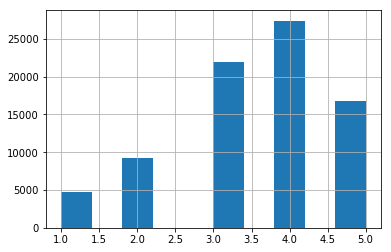

In [9]:
train1.rating.hist();

In [10]:
df=train1

### Average per user and item
I also append the average and the number of ratings to user and item dfs

In [11]:
avg_rat_item=df.groupby("item").rating.mean()
n_rat_item=df.groupby("item").rating.count()
avg=df.rating.mean()

##this is wrong, as it includes non-zero elements
#avg_rat_item=np.array(user_item.mean(axis=0))[0,:]
#avg_rat_user=np.array(user_item.mean(axis=1))[:,0]
#users["n_ratings"]=[len(r) for r in user_item.tolil().rows]
#items["n_ratings"]=[len(r) for r in user_item.T.tolil().rows]

items["avg_rating"]=avg_rat_item
items["avg_rating-avg"]=avg_rat_item-avg
items["n_ratings"]=n_rat_item

print(items.n_ratings.sum())  #sanity check
items.sort_values(by="avg_rating",ascending=False)[["name","avg_rating","avg_rating-avg", "n_ratings"]]

80000.0


,name,avg_rating,avg_rating-avg,n_ratings
1189,Prefontaine (1997),5.000000,1.471650,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.471650,1.0
1599,Someone Else's America (1995),5.000000,1.471650,1.0
1500,Santa with Muscles (1996),5.000000,1.471650,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,1.471650,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.471650,1.0
1122,They Made Me a Criminal (1939),5.000000,1.471650,1.0
1293,Star Kid (1997),5.000000,1.471650,3.0
1449,Pather Panchali (1955),4.714286,1.185936,7.0
1367,Faust (1994),4.666667,1.138317,3.0


In [12]:
avg_rat_user=df.groupby("user").rating.mean()
n_rat_user=df.groupby("user").rating.count()

users["avg_rating"]=avg_rat_user
users["avg_rating-avg"]=avg_rat_user-avg 
users["n_ratings"]=n_rat_user

print(users.n_ratings.sum())  #sanity check
users.sort_values(by="avg_rating",ascending=False)

80000


,age,sex,occup,?,avg_rating,avg_rating-avg,n_ratings
849,15,F,student,25652,4.869565,1.341215,23
688,37,F,administrator,60476,4.833333,1.304983,24
225,51,F,administrator,58202,4.800000,1.271650,15
507,18,F,writer,28450,4.724138,1.195788,58
628,13,M,none,94306,4.703704,1.175354,27
928,21,M,student,55408,4.687500,1.159150,32
118,21,M,administrator,90210,4.642857,1.114507,42
427,51,M,doctor,85258,4.583333,1.054983,24
907,25,F,other,80526,4.571429,1.043079,147
686,32,M,educator,26506,4.563380,1.035030,71


### Read test set

In [13]:
test1=pd.read_csv("ml-100k/u1.test",sep="\t",header=-1,encoding="latin-1",names=("user","item","rating","time"),
                  # parse_dates=[3,],date_parser=datetime.fromtimestamp
                  )

avg_test=test1.rating.mean()
print(avg_test)
test1.head()

3.5359


,user,item,rating,time
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


In [14]:
df_test=test1

# Recommendation

## 1st strategy: recommend best overall items for everyone
Here I just find the movies with the highest average rating, and recommend them to everyone.

First I find the best movies

### (1a) Just rank by average rating

In [15]:
#The best n_items_rec movies
n_items_rec=10
rec_items_a=items.sort_values(by="avg_rating",ascending=False)[:n_items_rec]
rec_items_index_a=rec_items_a.index
#print(rec_items_index_a)
items.loc[rec_items_index_a][["name", "avg_rating", "n_ratings"]]

,name,avg_rating,n_ratings
1189,Prefontaine (1997),5.000000,2.0
1653,Entertaining Angels: The Dorothy Day Story (1996),5.000000,1.0
1599,Someone Else's America (1995),5.000000,1.0
1500,Santa with Muscles (1996),5.000000,1.0
1467,"Saint of Fort Washington, The (1993)",5.000000,2.0
1201,Marlene Dietrich: Shadow and Light (1996),5.000000,1.0
1122,They Made Me a Criminal (1939),5.000000,1.0
1293,Star Kid (1997),5.000000,3.0
1449,Pather Panchali (1955),4.714286,7.0
1367,Faust (1994),4.666667,3.0


These are obscure movies which got 5 by one or two users.

Let's try recommending the first 10 items of this list to the users.

In [16]:
#Example: The average rating with n_items_rec=10 suggestions per user
#here I find the recommended items in the test set
test_rec_a=df_test[df_test["item"].isin(rec_items_index_a)]
print(len(df_test),len(test_rec_a))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_a.rating.mean())
print("number of successful suggested items= ",test_rec_a.rating.count())
print("number of successful suggested items per user = ",test_rec_a.rating.count()/len(users))

20000 5
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  4.2
number of successful suggested items=  5
number of successful suggested items per user =  0.00530222693531


The average rating is good, but I only got 5 successful recommendations out of 9430, so it is probably not a good strategy

### (1a-b) Bayesian Ranking

Let's apply a Bayesian ranking model to the rating system ( "Bayesian methods for hackers", p. 122).
This should be better than ranking by average rating, since it penalizes items with few ratings.

It calculates the 95th percentile of the posterior probability distribution, starting from a flat prior (all ratings 1 2 3 4 5 equally probable).

Since we know that the posterior is a beta function, it is possible to compute this ranking analytically (see book for details).

In [123]:
def pct95_ab(a,b):
    """bayesian methods for hackers, p. 122"""
    return a/(a+b)-1.65*np.sqrt(a*b/((a+b)**2*(a+b+1)))

def pct95_SN_04(S,N):
    """here I consider 1->0 2->0.25 3->0.5 4->0.75 1->1"""
    s=S/N
    #u=s/5*N
    u=(s-1)/4*N
    a=1+u
    b=1+N-u
    return pct95_ab(a,b)

def pct95_SN_15(S,N):
    """here I consider 1->0.2 2->0.4 3->0.6 4->0.8 1->1"""
    s=S/N
    u=s/5*N
    a=1+u
    b=1+N-u
    return pct95_ab(a,b)

In [128]:
items['bayes95_04'] = items[['total_rating','n_ratings']].apply(lambda x: pct95_SN_04(*x), axis=1)
items['bayes95_15'] = items[['total_rating','n_ratings']].apply(lambda x: pct95_SN_15(*x), axis=1)

In [129]:
items[["name","total_rating","n_ratings","avg_rating","bayes95_04","bayes95_15"]].sort_values(by="bayes95_04",ascending=False)

,name,total_rating,n_ratings,avg_rating,bayes95_04,bayes95_15
318,Schindler's List (1993),1064.0,237.0,4.489451,0.833340,0.861850
408,"Close Shave, A (1995)",424.0,93.0,4.559140,0.827167,0.853354
169,"Wrong Trousers, The (1993)",439.0,97.0,4.525773,0.818933,0.846810
483,Casablanca (1942),866.0,195.0,4.441026,0.815501,0.846751
64,"Shawshank Redemption, The (1994)",985.0,223.0,4.417040,0.812040,0.844333
50,Star Wars (1977),2110.0,484.0,4.359504,0.810962,0.845256
12,"Usual Suspects, The (1995)",928.0,211.0,4.398104,0.805559,0.838890
603,Rear Window (1954),754.0,173.0,4.358382,0.789630,0.825252
98,"Silence of the Lambs, The (1991)",1286.0,300.0,4.286667,0.783083,0.821588
313,Titanic (1997),1186.0,277.0,4.281588,0.780062,0.818922


Under this approach, the overall best movie is "Schindler's List".

Let's try recommending:

In [130]:
#Example: The average rating with n_items_rec=10 suggestions per user
#here I find the recommended items in the test set
#The best n_items_rec movies
n_items_rec=10
rec_items_a=items.sort_values(by="bayes95_04",ascending=False)[:n_items_rec]
rec_items_index_a=rec_items_a.index
#print(rec_items_index_a)
items.loc[rec_items_index_a][["name", "avg_rating", "n_ratings"]]
test_rec_a=df_test[df_test["item"].isin(rec_items_index_a)]
print(len(df_test),len(test_rec_a))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_a.rating.mean())
print("number of successful suggested items= ",test_rec_a.rating.count())
print("number of successful suggested items per user = ",test_rec_a.rating.count()/len(users))

20000 563
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  4.3481349911190055
number of successful suggested items=  563
number of successful suggested items per user =  0.597030752916


So we get a larger average rating (4.35 vs 4.2), and many more successful suggestions (0.6 vs 0.005 per user). 

So let's keep this approach if we want to highest average rating

### (1b) Rank by most viewed
Let's try with the most viewed movies.

In [131]:
n_items_rec=10
rec_items_b=items.sort_values(by="n_ratings",ascending=False)[:n_items_rec]
rec_items_index_b=rec_items_b.index
#print(rec_items_index_b)
items.loc[rec_items_index_b][["name", "avg_rating","avg_rating-avg" ,"n_ratings"]]

,name,avg_rating,avg_rating-avg,n_ratings
50,Star Wars (1977),4.359504,0.831154,484.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0
258,Contact (1997),3.823383,0.295033,402.0
100,Fargo (1996),4.108861,0.580511,395.0
294,Liar Liar (1997),3.164975,-0.363375,394.0
288,Scream (1996),3.445013,-0.083337,391.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0
1,Toy Story (1995),3.892950,0.364600,383.0
121,Independence Day (ID4) (1996),3.390935,-0.137415,353.0
300,Air Force One (1997),3.656250,0.127900,352.0


These are well-known movies, even though some have below-par ratings (Liar Liar, Scream, ID) 

In [132]:
test_rec_b=df_test[df_test["item"].isin(rec_items_index_b)]
print(len(df_test),len(test_rec_b))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_b.rating.mean())
print("number of successful suggested items= ",test_rec_b.rating.count())
print("number of successful suggested items per user = ",test_rec_b.rating.count()/len(users))

20000 899
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.7853170189099
number of successful suggested items=  899
number of successful suggested items per user =  0.953340402969


Here I get an average of almost 1 useful recommendation per user, but with a lower average rating than before.

### (1c) Rank by total rating
Here I take total_rating as the sum of all ratings. It is a comprimise between quantity and quality

In [19]:
items["total_rating"]=df.groupby("item").rating.sum()

In [20]:
n_items_rec=10
rec_items_c=items.sort_values(by="total_rating",ascending=False)[:n_items_rec]
rec_items_index_c=rec_items_c.index
#print(rec_items_index_b)
items.loc[rec_items_index_c][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0
100,Fargo (1996),4.108861,0.580511,395.0,1623.0
258,Contact (1997),3.823383,0.295033,402.0,1537.0
1,Toy Story (1995),3.892950,0.364600,383.0,1491.0
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0
286,"English Patient, The (1996)",3.641753,0.113403,388.0,1413.0
288,Scream (1996),3.445013,-0.083337,391.0,1347.0
300,Air Force One (1997),3.656250,0.127900,352.0,1287.0


Here I get popular movies with good ratings, even though Scream, which is slightly below-par, is still in the top 10.

In [21]:
test_rec_c=df_test[df_test["item"].isin(rec_items_index_c)]
print(len(df_test),len(test_rec_c))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested items= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_c.rating.mean())
print("number of successful suggested items= ",test_rec_c.rating.count())
print("number of successful suggested items per user = ",test_rec_c.rating.count()/len(users))

20000 881
number of recommended items per users=  10
number of suggested items=  9430
mean for the successful suggested items=  3.9580022701475595
number of successful suggested items=  881
number of successful suggested items per user =  0.934252386002


So we have slightly less successful recommendations (0.93 vs 0.95 per user), but with a somewhat higher average rating (3.96 vs 3.79)

### (1d) Rank by total ranking - avg_rating
I think another good KPI could be how many users like a movie more than the average.

So: (avg_ranking(item)-avg_ranking(all items)) * n_rankings(item)

Once again, it is a comprimise between quantity and quality, but with a stress on quality.

In [22]:
items["total_rating-avg"]=items["avg_rating-avg"]*items["n_ratings"]
#items.sort_values(by="tot_rating-avg",ascending=False)[["name","avg_rating","n_ratings","tot_rating-avg" ]]

In [23]:
n_items_rec=10
rec_items_d=items.sort_values(by="total_rating-avg",ascending=False)[:n_items_rec]
rec_items_index_d=rec_items_d.index
#print(rec_items_index_b)
items.loc[rec_items_index_d][["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]]

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
50,Star Wars (1977),4.359504,0.831154,484.0,2110.0,402.27860
127,"Godfather, The (1972)",4.258824,0.730474,340.0,1448.0,248.36100
174,Raiders of the Lost Ark (1981),4.247093,0.718743,344.0,1461.0,247.24760
100,Fargo (1996),4.108861,0.580511,395.0,1623.0,229.30175
318,Schindler's List (1993),4.489451,0.961101,237.0,1064.0,227.78105
98,"Silence of the Lambs, The (1991)",4.286667,0.758317,300.0,1286.0,227.49500
313,Titanic (1997),4.281588,0.753238,277.0,1186.0,208.64705
181,Return of the Jedi (1983),4.011848,0.483498,422.0,1693.0,204.03630
64,"Shawshank Redemption, The (1994)",4.417040,0.888690,223.0,985.0,198.17795
172,"Empire Strikes Back, The (1980)",4.196610,0.668260,295.0,1238.0,197.13675


This way I get reasonable results for the best movies. Star Wars has really an edge here, thanks to good rating (not the highest one, though) and a lot of views. 

Schindler's List, for example, has in principle a higher rating (it is first in the bayesian ranking for best average score), but less views, so it is well behind.

By construction, we do not have items below-par in the top items.

On the opposite, this way we penalize popular items below par, which end up at the end of the list):

In [24]:
items[["name", "avg_rating","avg_rating-avg" ,"n_ratings","total_rating","total_rating-avg"]].sort_values(by="total_rating-avg",ascending=False).dropna().tail(10)

,name,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
231,Batman Returns (1992),2.666667,-0.861683,114.0,304.0,-98.23190
259,George of the Jungle (1997),2.766917,-0.761433,133.0,368.0,-101.27055
748,"Saint, The (1997)",3.121094,-0.407256,256.0,799.0,-104.25760
323,Dante's Peak (1997),3.000000,-0.528350,199.0,597.0,-105.14165
243,Jungle2Jungle (1997),2.490741,-1.037609,108.0,269.0,-112.06180
289,Evita (1996),2.961905,-0.566445,210.0,622.0,-118.95350
358,Spawn (1997),2.610687,-0.917663,131.0,342.0,-120.21385
235,Mars Attacks! (1996),2.836158,-0.692192,177.0,502.0,-122.51795
678,Volcano (1997),2.847826,-0.680524,184.0,524.0,-125.21640
294,Liar Liar (1997),3.164975,-0.363375,394.0,1247.0,-143.16990


So we find Liar Liar at the bottom, while it was in the top 10 with the total number of views.

Let's try recommending:

In [25]:
test_rec_d=df_test[df_test["item"].isin(rec_items_index_d)]
print(len(df_test),len(test_rec_d))
print("number of recommended items per users= ",n_items_rec)
print("number of suggested it§ems= ",n_items_rec*len(users))
print("mean for the successful suggested items= ",test_rec_d.rating.mean())
print("number of successful suggested items= ",test_rec_d.rating.count())
print("number of successful suggested items per user = ",test_rec_d.rating.count()/len(users))

20000 802
number of recommended items per users=  10
number of suggested it§ems=  9430
mean for the successful suggested items=  4.28428927680798
number of successful suggested items=  802
number of successful suggested items per user =  0.850477200424


Now the number of successful recommendations has dropped to 0.85 vs 0.93 per user, but the average rating has increased  from 3.96 to 4.28.

It all depends on how you want to define a good movie, so how you define your KPI (key performance indicator).

### (1a-1b-1c-1d) Plots
Let's do some plots to compare the different strategies.

For each strategy I change the number of recommended items per user, from 1 to a given maximum items_max, and collect the 4 KPIs as a function of this number; I also compare train/test.

So I have a total of 32 columns: 4 strategies (optimizing each of the KPIs), 4 KPIs and train vs test. I use a triple-index for this purpose.

As a row I will put the number of recommended items per user.

In [135]:
#rec_items_list=list(range(1,len(items)))
items_max=60
mean_train=df.rating.mean()
mean_test=df_test.rating.mean()
rec_items_list=list(range(1,items_max))
strategies=["bayes95_04","n_ratings","total_rating","total_rating-avg"]
kpi=["k_avg_rating","k_n_ratings","k_total_rating","k_total_rating-avg"]
#kpi=["k_"+s for s in strategies]
data_sets=["df","df_test"]

skd=[(s,k,d) for s in strategies for k in kpi for d in data_sets]
index = pd.MultiIndex.from_tuples(skd, names=['Strategy', 'KPI','Train/Test'])
strategy_df=pd.DataFrame(columns=index,index=rec_items_list)
strategy_df.index.rename("n_items",inplace=True)
#strategy_df

In [136]:
for s in strategies:                                       #the 4 strategies
    print("Strategy",s)
    items_sorted=items.sort_values(by=s,ascending=False)   #sort items by strategy  
    for i in rec_items_list:                               #number of items to recommend
       # print("N.Items",i)
        rec_items=items_sorted[:i]                         #choose the first i items
        rec_items_index=rec_items.index                    #get their index
        for k in kpi:                                      #the 4 kpis
            #print("kpi",k)
            for d in data_sets:                            #the train/test datasets
                #print(d)
                if (d=="df_test"):
                    rec =df_test[df_test["item"].isin(rec_items_index)]    #find them in the test set
                    d_mean=mean_train
                    length=len(df_test)
                    #print(d)
                if (d=="df"):   
                    rec=df[df["item"].isin(rec_items_index)]                #find them also in the train set 
                    d_mean=mean_test
                    length=len(df)

                if(k=="k_n_ratings"):       strategy_df.loc[i,(s,k,d)]=rec.rating.count()/length
                if(k=="k_total_rating"):    strategy_df.loc[i,(s,k,d)]=rec.rating.sum()/length
                if(k=="k_avg_rating"):      strategy_df.loc[i,(s,k,d)]=rec.rating.mean()
                if(k=="k_total_rating-avg"):strategy_df.loc[i,(s,k,d)]=((rec.rating.mean()-d_mean)*rec.rating.count())/length



Strategy bayes95_04
Strategy n_ratings
Strategy total_rating
Strategy total_rating-avg


In [137]:
strategy_df

Strategy     bayes95_04                                                        \
KPI        k_avg_rating          k_n_ratings          k_total_rating            
Train/Test           df  df_test          df  df_test             df  df_test   
n_items                                                                         
1               4.48945  4.37705   0.0029625  0.00305         0.0133  0.01335   
2               4.50909    4.325    0.004125    0.004         0.0186   0.0173   
3               4.51288  4.29703   0.0053375  0.00505      0.0240875   0.0217   
4               4.49035  4.36913    0.007775  0.00745      0.0349125  0.03255   
5               4.47101  4.42105   0.0105625  0.01045       0.047225   0.0462   
6                4.4304  4.39935   0.0166125   0.0154         0.0736  0.06775   
7               4.42597  4.39011     0.01925   0.0182         0.0852   0.0799   
8               4.41915   4.4025   0.0214125     0.02       0.094625  0.08805   
9                4.3994  4.38367   0.0251625   0.0245         0.1107   0.1074   
10              4.38515  4.34813    0.028625  0.02815       0.125525   0.1224   
11               4.3784  4.33874     0.03125  0.03085       0.136825  0.13385   
12              4.36408  4.34493      0.0355   0.0345       0.154925   0.1499   
13              4.35144  4.33812      0.0398   0.0383       0.173187  0.16615   
14              4.34839   4.3354     0.04205  0.04025        0.18285   0.1745   
15              4.34554  4.33491    0.044025  0.04225       0.191312  0.18315   
16              4.34362  4.33107   0.0457625  0.04425       0.198775  0.19165   
17              4.34281   4.3348   0.0470375   0.0454       0.204275   0.1968   
18              4.33218  4.32755    0.050725    0.049        0.21975  0.21205   
19               4.3286  4.31724      0.0528  0.05075        0.22855   0.2191   
20              4.32027  4.30568    0.056125  0.05365       0.242475    0.231   
21              4.31807  4.30423   0.0578875  0.05555       0.249963   0.2391   
22              4.31536  4.30649   0.0598125  0.05775       0.258113   0.2487   
23              4.31341  4.30795      0.0615   0.0591       0.265275   0.2546   
24              4.30707  4.29822   0.0645625   0.0617       0.278075   0.2652   
25              4.30474  4.29992     0.06645  0.06385        0.28605  0.27455   
26                4.305  4.30047   0.0672125   0.0644        0.28935  0.27695   
27               4.3011  4.29826   0.0694125  0.06605        0.29855   0.2839   
28              4.28833  4.29986     0.07435   0.0717       0.318837   0.3083   
29              4.28365  4.29558    0.077075   0.0746       0.330163  0.32045   
30              4.28208  4.29011      0.0787  0.07635          0.337  0.32755   
31              4.27745   4.2839      0.0815   0.0789       0.348612    0.338   
32              4.27668  4.28554   0.0828125   0.0802       0.354162   0.3437   
33              4.27192  4.28247   0.0856875  0.08355        0.36605   0.3578   
34              4.27246  4.28706     0.08625  0.08465         0.3685   0.3629   
35              4.26886  4.27775   0.0886625  0.08695       0.378487  0.37195   
36              4.26713   4.2809   0.0903125    0.089       0.385375    0.381   
37              4.26596  4.28106     0.09165  0.09055       0.390975  0.38765   
38              4.25951  4.26702   0.0949875    0.094         0.4046   0.4011   
39              4.25283  4.26242   0.0982875   0.0966          0.418  0.41175   
40              4.24898  4.26254    0.100663  0.09865       0.427712   0.4205   
41              4.24917  4.26006    0.101288   0.0994       0.430387  0.42345   
42              4.23742  4.24891    0.106563  0.10365        0.45155   0.4404   
43              4.23625  4.25107    0.107938  0.10495        0.45725  0.44615   
44              4.23537  4.25248    0.109137  0.10575       0.462238   0.4497   
45               4.2344  4.25047    0.110387   0.1068       0.467425  0.45395   
46              4.23074  4.2510

In [138]:
s2=strategy_df.T.unstack(level=2)
s2=s2.swaplevel(i=-2, j=-1, axis=1)
#s2=s2.swaplevel(i=0, j=1, axis=0)
s2["df"].T

Strategy   bayes95_04                                                \
KPI      k_avg_rating k_n_ratings k_total_rating k_total_rating-avg   
n_items                                                               
1             4.48945   0.0029625         0.0133          0.0028249   
2             4.50909    0.004125         0.0186         0.00401441   
3             4.51288   0.0053375      0.0240875         0.00521463   
4             4.49035    0.007775      0.0349125         0.00742088   
5             4.47101   0.0105625       0.047225         0.00987706   
6              4.4304   0.0166125         0.0736          0.0148599   
7             4.42597     0.01925         0.0852          0.0171339   
8             4.41915   0.0214125       0.094625          0.0189125   
9              4.3994   0.0251625         0.1107          0.0217279   
10            4.38515    0.028625       0.125525          0.0243099   
11             4.3784     0.03125       0.136825          0.0263281   
12            4.36408      0.0355       0.154925          0.0294006   
13            4.35144      0.0398       0.173187          0.0324587   
14            4.34839     0.04205        0.18285          0.0341654   
15            4.34554    0.044025       0.191312          0.0356445   
16            4.34362   0.0457625       0.198775          0.0369634   
17            4.34281   0.0470375       0.204275          0.0379551   
18            4.33218    0.050725        0.21975          0.0403915   
19             4.3286      0.0528        0.22855          0.0418545   
20            4.32027    0.056125       0.242475          0.0440226   
21            4.31807   0.0578875       0.249963          0.0452781   
22            4.31536   0.0598125       0.258113          0.0466215   
23            4.31341      0.0615       0.265275          0.0478172   
24            4.30707   0.0645625       0.278075          0.0497885   
25            4.30474     0.06645        0.28605          0.0510894   
26              4.305   0.0672125        0.28935          0.0516933   
27             4.3011   0.0694125        0.29855          0.0531143   
28            4.28833     0.07435       0.318837          0.0559433   
29            4.28365    0.077075       0.330163           0.057633   
30            4.28208      0.0787          0.337          0.0587247   
31            4.27745      0.0815       0.348612          0.0604367   
32            4.27668   0.0828125       0.354162          0.0613458   
33            4.27192   0.0856875        0.36605          0.0630676   
34            4.27246     0.08625         0.3685          0.0635286   
35            4.26886   0.0886625       0.378487          0.0649858   
36            4.26713   0.0903125       0.385375           0.066039   
37            4.26596     0.09165       0.390975          0.0669098   
38            4.25951   0.0949875         0.4046          0.0687337   
39            4.25283   0.0982875          0.418          0.0704652   
40            4.24898    0.100663       0.427712            0.07178   
41            4.24917    0.101288       0.430387           0.072245   
42            4.23742    0.106563        0.45155          0.0747557   
43            4.23625    0.107938        0.45725          0.0755938   
44            4.23537    0.109137       0.462238          0.0763382   
45             4.2344    0.110387       0.467425          0.0771058   
46            4.23074    0.112787       0.477175          0.0783697   
47            4.22927    0.114275         0.4833           0.079235   
48            4.22616    0.116513         0.4924          0.0804235   
49            4.21925    0.120413        0.50805          0.0822834   
50            4.21752    0.122112       0.515012          0.0832349   
51            4.21529    0.124075       0.523012          0.0842957   
52            4.21436    0.125375       0.528375          0.0850615   
53            4.21357      0.1266       0.533438          0.0857926   
54            4.21279   

In [139]:
s2=strategy_df.T.unstack(level=2)
s2=s2.swaplevel(i=-2, j=-1, axis=1)
s2=s2.swaplevel(i=0, j=1, axis=0).sort_index(0)
#s2.columns = s2.columns.tolist()
#s2.columns = s2.columns.get_level_values(0)
#s2.plot(subplots=True, layout=(4,4))
#s2.index= s2.index.tolist()
s_train=s2["df"].T
s_test=s2["df_test"].T
#s_train.columns = s_train.columns.tolist()
#s_test.columns = s_test.columns.tolist()
s_test.head()

KPI      k_avg_rating                                         k_n_ratings  \
Strategy   bayes95_04 n_ratings total_rating total_rating-avg  bayes95_04   
n_items                                                                     
1             4.37705   4.35354      4.35354          4.35354     0.00305   
2               4.325   4.18478      4.18478          4.37209       0.004   
3             4.29703   4.01718      4.23569          4.34274     0.00505   
4             4.36913   4.10149      4.10149          4.33518     0.00745   
5             4.42105   3.92121      4.05708          4.34123     0.01045   

KPI                                              k_total_rating            \
Strategy n_ratings total_rating total_rating-avg     bayes95_04 n_ratings   
n_items                                                                     
1          0.00495      0.00495          0.00495        0.01335   0.02155   
2           0.0092       0.0092           0.0086         0.0173    0.0385   
3          0.01455      0.01485           0.0124         0.0217   0.05845   
4           0.0202       0.0202          0.01805        0.03255   0.08285   
5          0.02475      0.02365           0.0211         0.0462   0.09705   

KPI                                    k_total_rating-avg              \
Strategy total_rating total_rating-avg         bayes95_04   n_ratings   
n_items                                                                 
1             0.02155          0.02155         0.00258853  0.00408467   
2              0.0385           0.0376          0.0031866  0.00603918   
3              0.0629          0.05385         0.00388183  0.00711251   
4             0.08285          0.07825         0.00626379   0.0115773   
5             0.09595           0.0916         0.00932874  0.00972334   

KPI                                     
Strategy total_rating total_rating-avg  
n_items                                 
1          0.00408467       0.00408467  
2          0.00603918       0.00725619  
3            0.010504        0.0100985  
4           0.0115773        0.0145633  
5           0.0125045        0.0171518

/home/baruselli/anaconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:2470: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


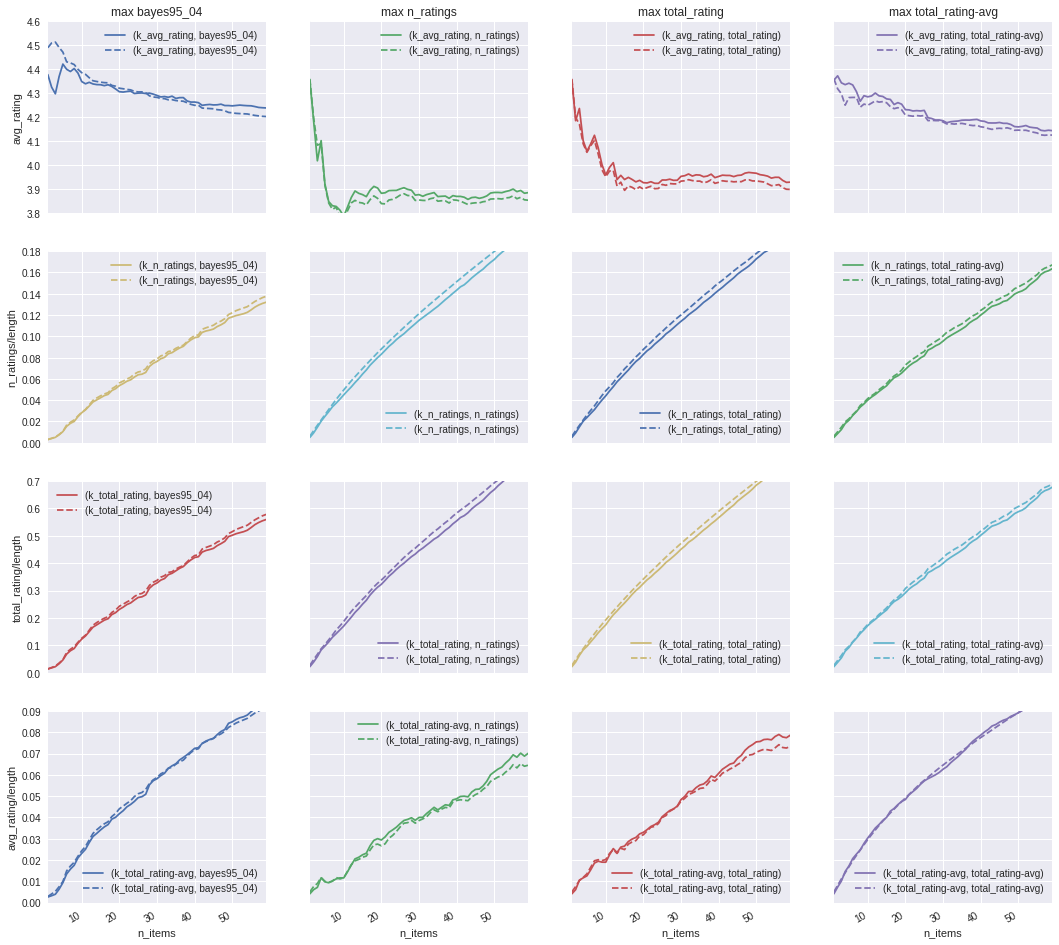

In [144]:
#strategy_df.info()
f, ax = plt.subplots(4,4,figsize=(18,18))
s_test.plot(subplots=True,figsize=(18,18),ax=ax,sharex=True,sharey=True);
s_train.plot(style="--",subplots=True,figsize=(18,18),ax=ax,sharex=True,sharey=True);
[a.set_ylim(3.8,4.6) for a in ax[0,:]]
[a.set_ylim(0,0.18) for a in ax[1,:]]
[a.set_ylim(0,0.7) for a in ax[2,:]]
[a.set_ylim(0,0.09) for a in ax[3,:]]
ax[0,0].set_title("max bayes95_04")
ax[0,1].set_title("max n_ratings")
ax[0,2].set_title("max total_rating")
ax[0,3].set_title("max total_rating-avg")
ax[0,0].set_ylabel("avg_rating")
ax[1,0].set_ylabel("n_ratings/length")
ax[2,0].set_ylabel("total_rating/length")
ax[3,0].set_ylabel("avg_rating/length");

#strategy_df.T

In [145]:
#to be used with seaborn
strategy_df["n_items"]=strategy_df.index
strategy_melt=pd.melt(strategy_df,id_vars="n_items")
strategy_melt

,n_items,Strategy,KPI,Train/Test,value
0,1,bayes95_04,k_avg_rating,df,4.48945
1,2,bayes95_04,k_avg_rating,df,4.50909
2,3,bayes95_04,k_avg_rating,df,4.51288
3,4,bayes95_04,k_avg_rating,df,4.49035
4,5,bayes95_04,k_avg_rating,df,4.47101
5,6,bayes95_04,k_avg_rating,df,4.4304
6,7,bayes95_04,k_avg_rating,df,4.42597
7,8,bayes95_04,k_avg_rating,df,4.41915
8,9,bayes95_04,k_avg_rating,df,4.3994
9,10,bayes95_04,k_avg_rating,df,4.38515


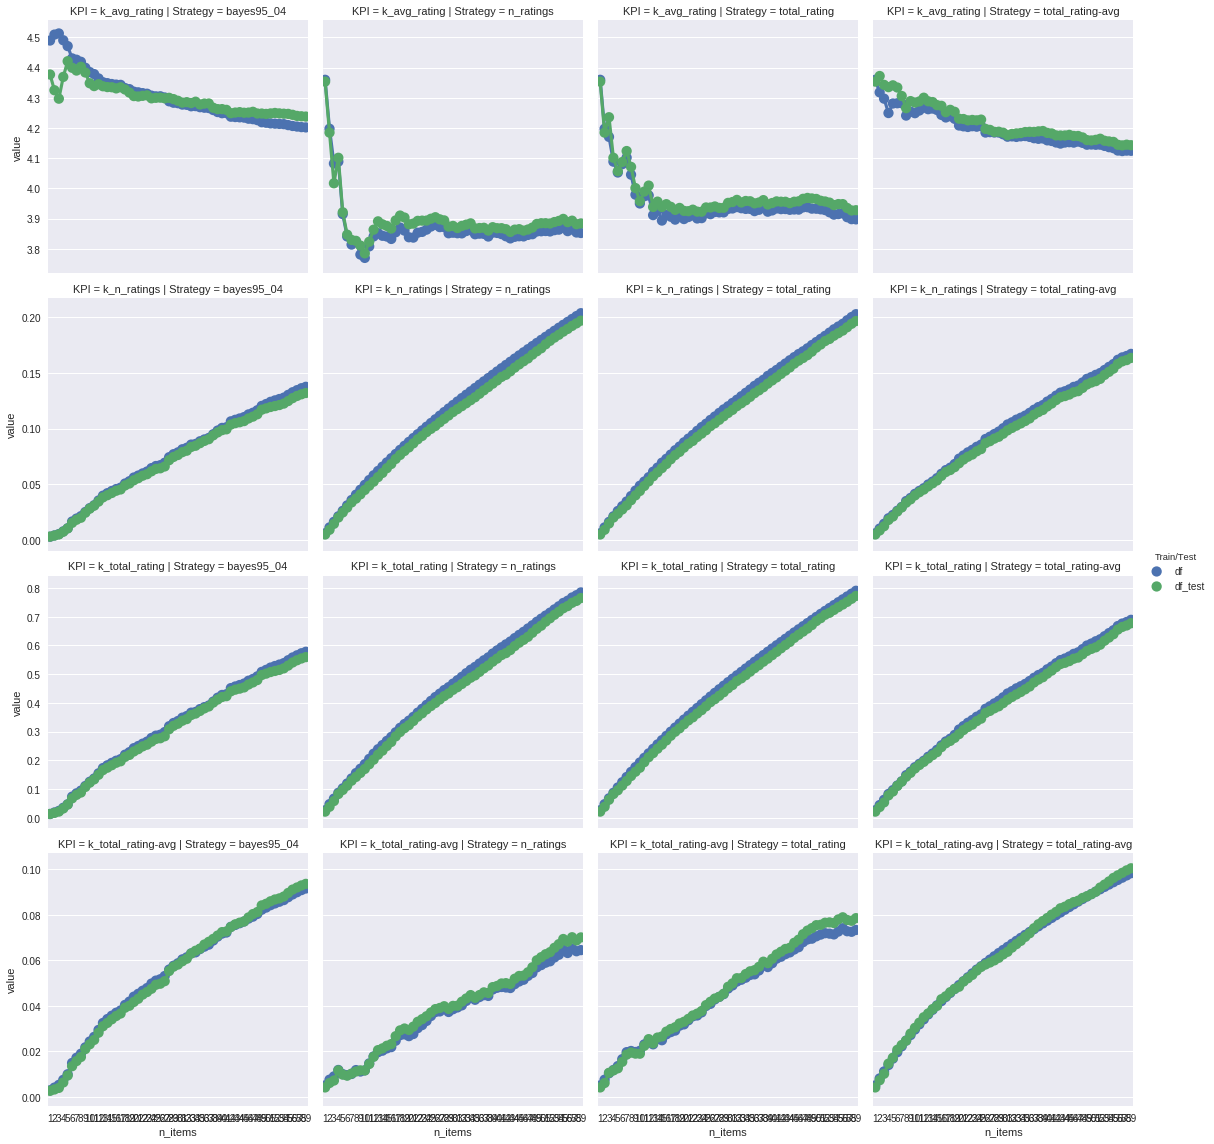

In [146]:
#f, ax = plt.subplots(4,4,figsize=(25,25))
import seaborn
fg = seaborn.factorplot(col="Strategy",row='KPI',hue="Train/Test",y="value",x="n_items", data=strategy_melt,
                       style="-",sharey="row",sharex=True) # hue='Mean', 


## 2nd strategy: Suggest similar items to the liked ones (same genre)
This is possible because we know a priori the genre of the movies (this is still non-collaborative).

I need two things:

- the best items per genre;
- the preferred genre(s) of each user.

Then I recommend to each user the most popular movies of his preferred genre(s).

### (2a) Recommendation per preferred genre
List_item_genre is a dictionary of dfs, each with items within a given genre

In [35]:
dict_item_genre={}
for i,g in enumerate(genres):                #loop over genres
    items_g_df=items[items[g]==1]
    dict_item_genre[g]=items_g_df.sort_values("total_rating",ascending=False)

For example, I can get Action:

In [36]:
dict_item_genre["Action"].head()

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Romance,Sci-Fi,Thriller,War,Western,avg_rating,avg_rating-avg,n_ratings,total_rating,total_rating-avg
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,1,1,0,1,0,4.359504,0.831154,484.0,2110.0,402.2786
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,1,1,0,1,0,4.011848,0.483498,422.0,1693.0,204.0363
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0,0,0,0,0,4.247093,0.718743,344.0,1461.0,247.2476
127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,...,0,0,0,0,0,4.258824,0.730474,340.0,1448.0,248.3610
300,Air Force One (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Air+Force+One...,0,1,0,0,0,0,...,0,0,1,0,0,3.656250,0.127900,352.0,1287.0,45.0208


... and all items within are of genre Action.

Now each user gets a score of how much he likes / watches each genre.

I will stick with total_score as KPI.

In [37]:
df_user_genre=pd.DataFrame(index=users.index,columns=genres)
for i,g in enumerate(genres):                     #loop over genres again
    items_g=list(items[items[g]==1].index)        #list of index of items of selected genre
    print(g)
    for u in users.index:                                 #loop over users
        df_user=df[df["user"]==u]
        df_user_genre.loc[u,g]=df_user[df_user["item"].isin(items_g)]["rating"].sum()

unknown
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western


This is the result:

In [38]:
df_user_genre.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0,95,42,25,32,174,37,24,223,3,5,13,13,14,92,79,89,43,4
2,0,17,4,4,8,33,24,0,91,0,5,3,3,8,53,3,33,6,0
3,0,17,10,0,0,20,12,5,39,0,2,3,4,15,9,17,22,9,0
4,0,22,9,0,0,10,14,5,15,0,0,0,5,13,3,11,24,4,0
5,0,103,69,36,33,127,17,0,34,0,0,39,26,7,23,75,21,27,1


In [39]:
rec_items_list=(1,5,10,20,30,40,50)

Here I define a macro to validate a given strategy

In [40]:
def validate_strategy(f_user_item,verbose=False,rec_items_list=rec_items_list,data_sets=data_sets,df=df,df_test=df_test):
    """Requires f_user_item: a fct that, given the index of user, returns the ordered index list of suggested items.
    Returns a df which contains the score for train and test sets as a fct of the number of reccomended items"""
    output_df=pd.DataFrame(index=rec_items_list,columns=data_sets,data=0)
    for u in users.index:
        df_user=df[df["user"]==u]
        df_user_test=df_test[df_test["user"]==u]
        items_sorted_index= f_user_item(u) 
        if(verbose): print(u, items.loc[items_sorted_index[0]]["name"])   #I print the best item for each user
        
        for i in rec_items_list:                               #number of items to recommend
            #print("N.Items",i)
            rec_items_index_i=items_sorted_index[:i]                    #get their index

            for d in data_sets:                            #the train/test datasets
                if (d=="df_test"):
                        rec =df_user_test[df_user_test["item"].isin(rec_items_index_i)]    #find them in the test set
                        length=len(df_test)
                        #print(d)
                if (d=="df"):   
                        rec=df_user[df_user["item"].isin(rec_items_index_i)]              #find them also in the train set 
                        length=len(df)

                output_df.loc[i,d]+=rec.rating.sum() #/length
        #print(output_df)

    #at the end I normalize to compare train and test   
    output_df["df"]/=len(df)
    output_df["df_test"]/=len(df_test) ;
    return output_df

Finally, I find the preferred genre of each user and suggest the best movies there

In [41]:
def strategy_2a(u):
    """Returns the best items for preferred genre of the user"""
    preferred_genre=df_user_genre[genres].loc[u].argmax()
    items_sorted=dict_item_genre[preferred_genre]["total_rating"]         #sorted items in genre  
    return items_sorted.index 

In [42]:
strategy2a_df=validate_strategy(strategy_2a,verbose=True)

1 Fargo (1996)
2 Fargo (1996)
3 Fargo (1996)
4 Fargo (1996)
5 Toy Story (1995)
6 Fargo (1996)
7 Fargo (1996)
8 Star Wars (1977)
9 Star Wars (1977)
10 Fargo (1996)
11 Fargo (1996)
12 Toy Story (1995)
13 Fargo (1996)
14 Fargo (1996)
15 Fargo (1996)
16 Fargo (1996)
17 Fargo (1996)
18 Fargo (1996)
19 Toy Story (1995)
20 Star Wars (1977)
21 Scream (1996)
22 Star Wars (1977)
23 Fargo (1996)
24 Fargo (1996)
25 Toy Story (1995)
26 Fargo (1996)
27 Star Wars (1977)
28 Fargo (1996)
29 Fargo (1996)
30 Star Wars (1977)
31 Fargo (1996)
32 Fargo (1996)
33 Fargo (1996)
34 Fargo (1996)
35 Star Wars (1977)
36 Toy Story (1995)
37 Star Wars (1977)
38 Toy Story (1995)
39 Fargo (1996)
40 Fargo (1996)
41 Fargo (1996)
42 Fargo (1996)
43 Toy Story (1995)
44 Fargo (1996)
45 Toy Story (1995)
46 Fargo (1996)
47 Fargo (1996)
48 Fargo (1996)
49 Toy Story (1995)
50 Fargo (1996)
51 Star Wars (1977)
52 Fargo (1996)
53 Star Wars (1977)
54 Star Wars (1977)
55 Star Wars (1977)
56 Star Wars (1977)
57 Toy Story (1995)
58 F

462 Fargo (1996)
463 Fargo (1996)
464 Fargo (1996)
465 Fargo (1996)
466 Star Wars (1977)
467 Fargo (1996)
468 Fargo (1996)
469 Fargo (1996)
470 Fargo (1996)
471 Toy Story (1995)
472 Star Wars (1977)
473 Fargo (1996)
474 Fargo (1996)
475 Fargo (1996)
476 Toy Story (1995)
477 Star Wars (1977)
478 Toy Story (1995)
479 Star Wars (1977)
480 Fargo (1996)
481 Toy Story (1995)
482 Star Wars (1977)
483 Star Wars (1977)
484 Star Wars (1977)
485 Fargo (1996)
486 Fargo (1996)
487 Fargo (1996)
488 Fargo (1996)
489 Fargo (1996)
490 Fargo (1996)
491 Fargo (1996)
492 Fargo (1996)
493 Star Wars (1977)
494 Fargo (1996)
495 Star Wars (1977)
496 Fargo (1996)
497 Star Wars (1977)
498 Fargo (1996)
499 Fargo (1996)
500 Fargo (1996)
501 Fargo (1996)
502 Fargo (1996)
503 Fargo (1996)
504 Fargo (1996)
505 Fargo (1996)
506 Star Wars (1977)
507 Star Wars (1977)
508 Toy Story (1995)
509 Star Wars (1977)
510 Fargo (1996)
511 Fargo (1996)
512 Fargo (1996)
513 Star Wars (1977)
514 Fargo (1996)
515 Fargo (1996)
516 Fa

915 Fargo (1996)
916 Fargo (1996)
917 Fargo (1996)
918 Fargo (1996)
919 Fargo (1996)
920 Fargo (1996)
921 Toy Story (1995)
922 Star Wars (1977)
923 Fargo (1996)
924 Fargo (1996)
925 Fargo (1996)
926 Fargo (1996)
927 Toy Story (1995)
928 Fargo (1996)
929 Fargo (1996)
930 Fargo (1996)
931 Fargo (1996)
932 Fargo (1996)
933 Fargo (1996)
934 Fargo (1996)
935 Fargo (1996)
936 Fargo (1996)
937 Fargo (1996)
938 Star Wars (1977)
939 Fargo (1996)
940 Fargo (1996)
941 Star Wars (1977)
942 Fargo (1996)
943 Star Wars (1977)


In [43]:
strategy1_df_0=strategy_df["total_rating"]["k_total_rating"]
rec_items_list=strategy2a_df.index
strategy1_df=strategy1_df_0.loc[rec_items_list]

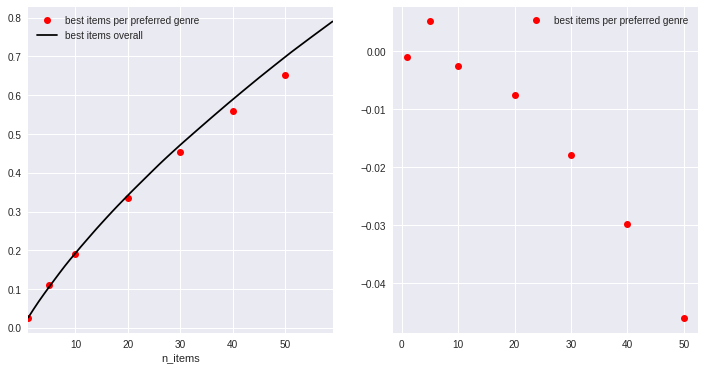

In [44]:
f_train, ax_train = plt.subplots(1,2,figsize=(12,6))
strategy2a_df["df"].plot(ax=ax_train[0],label="best items per preferred genre", style="ro")
strategy1_df_0["df"].plot(ax=ax_train[0],label="best items overall",color="k")
ax_train[0].legend();

ax_train[1].plot(rec_items_list,strategy2a_df["df"]-strategy1_df["df"],"ro",label="best items per preferred genre")
ax_train[1].legend();

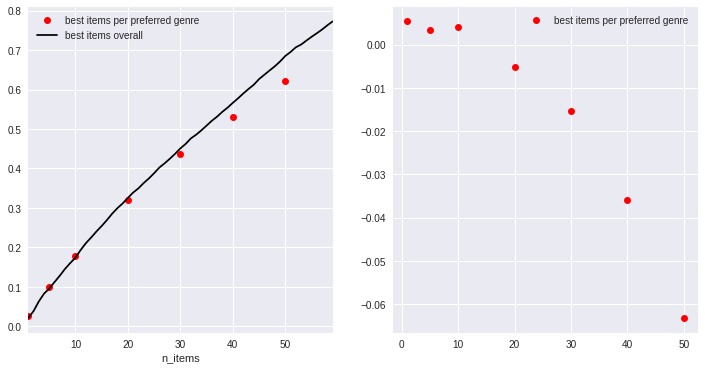

In [45]:
f_test, ax_test = plt.subplots(1,2,figsize=(12,6))
strategy2a_df["df_test"].plot(ax=ax_test[0],label="best items per preferred genre", style="ro")
strategy1_df_0["df_test"].plot(ax=ax_test[0],label="best items overall",color="k")
ax_test[0].legend();

ax_test[1].plot(rec_items_list,strategy2a_df["df_test"]-strategy1_df["df_test"],"ro",label="best items per preferred genre")
ax_test[1].legend();

We don't really gain much, and we lose for a lot of items, because we reach the end of the list fast.

### (2b) Weighted recommendation preferred genres / best items

Here I normalize the genres for each item so they sum to 1.

In [46]:
items["sum_genres"]=items[genres].sum(axis=1)
genres_norm=[g+"_norm" for g in genres]
for g in genres:
    items[g+"_norm"]=np.sqrt(items[g]/items["sum_genres"])
items[genres_norm].head()

,unknown_norm,Action_norm,Adventure_norm,Animation_norm,Children's_norm,Comedy_norm,Crime_norm,Documentary_norm,Drama_norm,Fantasy_norm,Film-Noir_norm,Horror_norm,Musical_norm,Mystery_norm,Romance_norm,Sci-Fi_norm,Thriller_norm,War_norm,Western_norm
1,0.0,0.00000,0.00000,0.57735,0.57735,0.57735,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.57735,0.57735,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0
3,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0
4,0.0,0.57735,0.00000,0.00000,0.00000,0.57735,0.00000,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.57735,0.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0


And I do the same for df_user_genre

In [47]:
df_user_genre["sum_ratings"]=df_user_genre[genres].sum(axis=1)
genres_norm=[g+"_norm" for g in genres]
for g in genres:
    df_user_genre[g+"_norm"]=(df_user_genre[g]/df_user_genre["sum_ratings"])**(0.5)
df_user_genre[genres_norm]

,unknown_norm,Action_norm,Adventure_norm,Animation_norm,Children's_norm,Comedy_norm,Crime_norm,Documentary_norm,Drama_norm,Fantasy_norm,Film-Noir_norm,Horror_norm,Musical_norm,Mystery_norm,Romance_norm,Sci-Fi_norm,Thriller_norm,War_norm,Western_norm
1,0,0.307148,0.204225,0.157563,0.178263,0.415681,0.191684,0.15438,0.470585,0.0545816,0.0704645,0.113621,0.113621,0.11791,0.302259,0.280091,0.29729,0.206642,0.0630253
2,0,0.240056,0.116445,0.116445,0.164677,0.334461,0.28523,0,0.555405,0,0.130189,0.100844,0.100844,0.164677,0.423864,0.100844,0.334461,0.142615,0
3,0,0.303959,0.233126,0,0,0.32969,0.255377,0.164845,0.460387,0,0.104257,0.127688,0.147442,0.28552,0.221163,0.303959,0.345782,0.221163,0
4,0,0.403687,0.258199,0,0,0.272166,0.322031,0.19245,0.333333,0,0,0,0.19245,0.310316,0.149071,0.28545,0.421637,0.172133,0
5,0,0.401798,0.328862,0.237542,0.227429,0.446161,0.163235,0,0.23085,0,0,0.247242,0.201872,0.104746,0.189869,0.342863,0.181426,0.205718,0.0395904
6,0,0.264993,0.247221,0.180305,0.228069,0.426679,0.207154,0,0.470177,0.0721218,0.13002,0.101996,0.21027,0.169141,0.322539,0.161269,0.239201,0.161269,0.139663
7,0,0.316132,0.237338,0.115435,0.198419,0.31421,0.201448,0.06961,0.456463,0.0738325,0.0778263,0.243635,0.192217,0.147665,0.250982,0.267342,0.311305,0.242389,0.137027
8,0,0.538516,0.382971,0,0.1,0.191485,0.270801,0,0.264575,0,0,0,0,0.1,0.208167,0.369685,0.33665,0.163299,0.208167
9,0,0.3371,0.3371,0,0,0.408248,0,0,0.379393,0,0,0.194625,0,0,0.460566,0.261116,0.246183,0.288675,0
10,0,0.252587,0.18621,0.105336,0.105336,0.372419,0.217156,0.105336,0.491255,0,0.162334,0.0832755,0.166551,0.223452,0.359148,0.158004,0.300254,0.25802,0.139347


In [48]:
#items[genres_norm+["total_rating"]]
df_item_genre=items[genres_norm+["total_rating"]]
#df_user_genre[genres_norm]


In [49]:
df_item_genre=items[genres_norm]
print(df_item_genre.shape)
print(df_user_genre[genres_norm].shape)

(1682, 19)
(943, 19)


In [50]:
array_user_item=np.array(df_user_genre[genres_norm]).dot(np.array(df_item_genre).T)
#df_user_genre.shape

This is n_users*n_items large, so should be avoided, but let's do an exception (it should be done user by user, but then it would be slow):

In [51]:
df_user_item=pd.DataFrame(array_user_item,index=users.index,columns=items.index)
print(df_user_item.min().min())
print(df_user_item.max().max())

0.0
0.955636773967


It describes how "similar" an item is to one user's likings, according to the item's genre and to the user ratings of previous movies of the same genre

In [52]:
def strategy_2b(u):
    """how much the preferred genres of the user coincide with the genre of the suggested movie"""
    df_user_item_u=df_user_item.loc[[u,]].T                #overlaps of given user with all items
    df_user_item_u["total_rating"]=items["total_rating"]   #I add the total rating of the items

    df_user_item_u["weighted_rating"]= (df_user_item_u[u])**(1)*df_user_item_u["total_rating"] #I multiply the two
    items_sorted=df_user_item_u.sort_values(by="weighted_rating",ascending=False)
    return items_sorted.index

In [53]:
strategy2b_df=validate_strategy(strategy_2b,verbose=True)

1 Star Wars (1977)
2 Fargo (1996)
3 Star Wars (1977)
4 Star Wars (1977)
5 Star Wars (1977)
6 Star Wars (1977)
7 Star Wars (1977)
8 Star Wars (1977)
9 Star Wars (1977)
10 Star Wars (1977)
11 Star Wars (1977)
12 Star Wars (1977)
13 Star Wars (1977)
14 Star Wars (1977)
15 Star Wars (1977)
16 Star Wars (1977)
17 Star Wars (1977)
18 Star Wars (1977)
19 Star Wars (1977)
20 Star Wars (1977)
21 Star Wars (1977)
22 Star Wars (1977)
23 Star Wars (1977)
24 Star Wars (1977)
25 Star Wars (1977)
26 Star Wars (1977)
27 Star Wars (1977)
28 Star Wars (1977)
29 Fargo (1996)
30 Star Wars (1977)
31 Star Wars (1977)
32 Star Wars (1977)
33 Fargo (1996)
34 Fargo (1996)
35 Star Wars (1977)
36 Star Wars (1977)
37 Star Wars (1977)
38 Star Wars (1977)
39 Fargo (1996)
40 Star Wars (1977)
41 Star Wars (1977)
42 Star Wars (1977)
43 Star Wars (1977)
44 Star Wars (1977)
45 Star Wars (1977)
46 Star Wars (1977)
47 Fargo (1996)
48 Fargo (1996)
49 Star Wars (1977)
50 Fargo (1996)
51 Star Wars (1977)
52 Star Wars (1977)
5

402 Star Wars (1977)
403 Star Wars (1977)
404 Star Wars (1977)
405 Star Wars (1977)
406 Star Wars (1977)
407 Star Wars (1977)
408 Star Wars (1977)
409 Star Wars (1977)
410 Fargo (1996)
411 Star Wars (1977)
412 Star Wars (1977)
413 Star Wars (1977)
414 Fargo (1996)
415 Star Wars (1977)
416 Star Wars (1977)
417 Star Wars (1977)
418 Fargo (1996)
419 Star Wars (1977)
420 Fargo (1996)
421 Star Wars (1977)
422 Star Wars (1977)
423 Fargo (1996)
424 Star Wars (1977)
425 Star Wars (1977)
426 Star Wars (1977)
427 Star Wars (1977)
428 Star Wars (1977)
429 Star Wars (1977)
430 Star Wars (1977)
431 Fargo (1996)
432 Star Wars (1977)
433 Star Wars (1977)
434 Star Wars (1977)
435 Star Wars (1977)
436 Fargo (1996)
437 Star Wars (1977)
438 Star Wars (1977)
439 Star Wars (1977)
440 Star Wars (1977)
441 Star Wars (1977)
442 Star Wars (1977)
443 Star Wars (1977)
444 Star Wars (1977)
445 Star Wars (1977)
446 Fargo (1996)
447 Star Wars (1977)
448 Fargo (1996)
449 Fargo (1996)
450 Star Wars (1977)
451 Star Wa

799 Star Wars (1977)
800 Star Wars (1977)
801 Star Wars (1977)
802 Star Wars (1977)
803 Star Wars (1977)
804 Star Wars (1977)
805 Star Wars (1977)
806 Star Wars (1977)
807 Star Wars (1977)
808 Fargo (1996)
809 Fargo (1996)
810 Star Wars (1977)
811 Star Wars (1977)
812 Star Wars (1977)
813 Star Wars (1977)
814 Scream (1996)
815 Star Wars (1977)
816 Star Wars (1977)
817 Star Wars (1977)
818 Star Wars (1977)
819 Fargo (1996)
820 Star Wars (1977)
821 Star Wars (1977)
822 Toy Story (1995)
823 Star Wars (1977)
824 Fargo (1996)
825 Star Wars (1977)
826 Star Wars (1977)
827 Star Wars (1977)
828 Fargo (1996)
829 Star Wars (1977)
830 Star Wars (1977)
831 Star Wars (1977)
832 Star Wars (1977)
833 Star Wars (1977)
834 Star Wars (1977)
835 Star Wars (1977)
836 Fargo (1996)
837 Star Wars (1977)
838 Star Wars (1977)
839 Star Wars (1977)
840 Star Wars (1977)
841 Star Wars (1977)
842 Fargo (1996)
843 Star Wars (1977)
844 Star Wars (1977)
845 English Patient, The (1996)
846 Star Wars (1977)
847 Star War

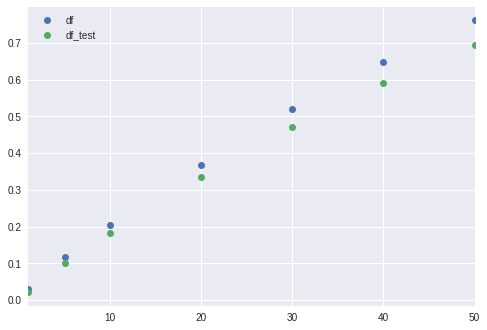

In [54]:
strategy2b_df.plot(style="o");

In [55]:
rec_items_list=strategy2a_df.index


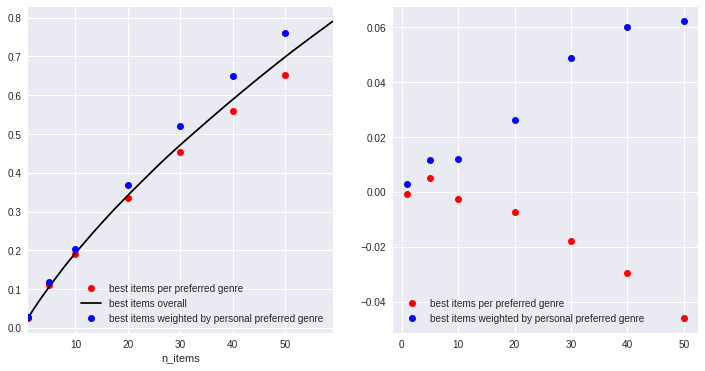

In [56]:
#train set
strategy2b_df["df"].plot(ax=ax_train[0],label="best items weighted by personal preferred genre", style="bo")
ax_train[0].legend();
ax_train[1].plot(rec_items_list,strategy2b_df["df"]-strategy1_df["df"],"bo",label="best items weighted by personal preferred genre")
ax_train[1].legend();
f_train

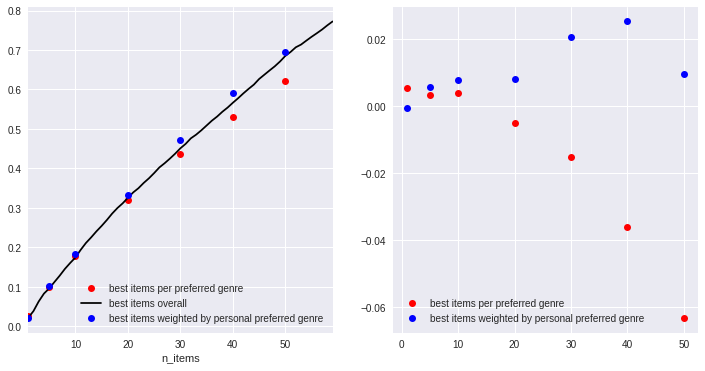

In [57]:
#test set
strategy2b_df["df_test"].plot(ax=ax_test[0],label="best items weighted by personal preferred genre", style="bo")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,strategy2b_df["df_test"]-strategy1_df["df_test"],"bo",label="best items weighted by personal preferred genre")
ax_test[1].legend();
f_test

We gain a little

## 3rd strategy: Liked items from the same user category

In addition to items' genre, we also know the category to which each user belongs. We can use this info to reccomend items from the same group of users.

For each user we have age, sex, occupation.

In [58]:
users.head()

,age,sex,occup,?,avg_rating,avg_rating-avg,n_ratings
1,24,M,technician,85711,3.681481,0.153131,135
2,53,F,other,94043,3.800000,0.271650,40
3,23,M,writer,32067,3.000000,-0.528350,28
4,24,M,technician,43537,4.357143,0.828793,14
5,33,F,other,15213,2.956044,-0.572306,91


### (3a) Segment by sex

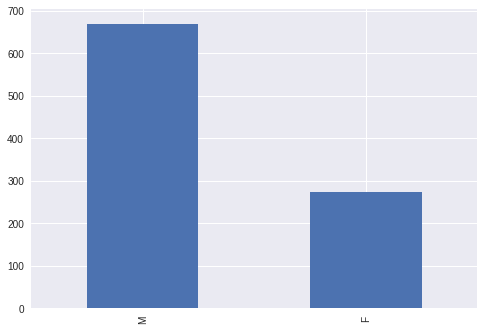

In [59]:
users.sex.value_counts().plot(kind='bar');

In [60]:
df_with_usersgroups=pd.merge(df, users[["age","sex","occup"]], left_on='user', right_index=True)
items_mf=df_with_usersgroups.groupby(["item","sex"]).rating.sum().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_mf.head()

sex,F,M
item,,
1,380.0,1111.0
2,48.0,286.0
3,33.0,192.0
4,126.0,477.0
5,66.0,162.0


In [61]:
def strategy_3a(u):
    """given u index of user, returns the index of the best items according to his sex"""
    df_user_item_u=items_mf[users.loc[u].sex]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3a_df=validate_strategy(strategy_3a,verbose=True)
    

1 Star Wars (1977)
2 Star Wars (1977)
3 Star Wars (1977)
4 Star Wars (1977)
5 Star Wars (1977)
6 Star Wars (1977)
7 Star Wars (1977)
8 Star Wars (1977)
9 Star Wars (1977)
10 Star Wars (1977)
11 Star Wars (1977)
12 Star Wars (1977)
13 Star Wars (1977)
14 Star Wars (1977)
15 Star Wars (1977)
16 Star Wars (1977)
17 Star Wars (1977)
18 Star Wars (1977)
19 Star Wars (1977)
20 Star Wars (1977)
21 Star Wars (1977)
22 Star Wars (1977)
23 Star Wars (1977)
24 Star Wars (1977)
25 Star Wars (1977)
26 Star Wars (1977)
27 Star Wars (1977)
28 Star Wars (1977)
29 Star Wars (1977)
30 Star Wars (1977)
31 Star Wars (1977)
32 Star Wars (1977)
33 Star Wars (1977)
34 Star Wars (1977)
35 Star Wars (1977)
36 Star Wars (1977)
37 Star Wars (1977)
38 Star Wars (1977)
39 Star Wars (1977)
40 Star Wars (1977)
41 Star Wars (1977)
42 Star Wars (1977)
43 Star Wars (1977)
44 Star Wars (1977)
45 Star Wars (1977)
46 Star Wars (1977)
47 Star Wars (1977)
48 Star Wars (1977)
49 Star Wars (1977)
50 Star Wars (1977)
51 Star W

398 Star Wars (1977)
399 Star Wars (1977)
400 Star Wars (1977)
401 Star Wars (1977)
402 Star Wars (1977)
403 Star Wars (1977)
404 Star Wars (1977)
405 Star Wars (1977)
406 Star Wars (1977)
407 Star Wars (1977)
408 Star Wars (1977)
409 Star Wars (1977)
410 Star Wars (1977)
411 Star Wars (1977)
412 Star Wars (1977)
413 Star Wars (1977)
414 Star Wars (1977)
415 Star Wars (1977)
416 Star Wars (1977)
417 Star Wars (1977)
418 Star Wars (1977)
419 Star Wars (1977)
420 Star Wars (1977)
421 Star Wars (1977)
422 Star Wars (1977)
423 Star Wars (1977)
424 Star Wars (1977)
425 Star Wars (1977)
426 Star Wars (1977)
427 Star Wars (1977)
428 Star Wars (1977)
429 Star Wars (1977)
430 Star Wars (1977)
431 Star Wars (1977)
432 Star Wars (1977)
433 Star Wars (1977)
434 Star Wars (1977)
435 Star Wars (1977)
436 Star Wars (1977)
437 Star Wars (1977)
438 Star Wars (1977)
439 Star Wars (1977)
440 Star Wars (1977)
441 Star Wars (1977)
442 Star Wars (1977)
443 Star Wars (1977)
444 Star Wars (1977)
445 Star Wars

789 Star Wars (1977)
790 Star Wars (1977)
791 Star Wars (1977)
792 Star Wars (1977)
793 Star Wars (1977)
794 Star Wars (1977)
795 Star Wars (1977)
796 Star Wars (1977)
797 Star Wars (1977)
798 Star Wars (1977)
799 Star Wars (1977)
800 Star Wars (1977)
801 Star Wars (1977)
802 Star Wars (1977)
803 Star Wars (1977)
804 Star Wars (1977)
805 Star Wars (1977)
806 Star Wars (1977)
807 Star Wars (1977)
808 Star Wars (1977)
809 Star Wars (1977)
810 Star Wars (1977)
811 Star Wars (1977)
812 Star Wars (1977)
813 Star Wars (1977)
814 Star Wars (1977)
815 Star Wars (1977)
816 Star Wars (1977)
817 Star Wars (1977)
818 Star Wars (1977)
819 Star Wars (1977)
820 Star Wars (1977)
821 Star Wars (1977)
822 Star Wars (1977)
823 Star Wars (1977)
824 Star Wars (1977)
825 Star Wars (1977)
826 Star Wars (1977)
827 Star Wars (1977)
828 Star Wars (1977)
829 Star Wars (1977)
830 Star Wars (1977)
831 Star Wars (1977)
832 Star Wars (1977)
833 Star Wars (1977)
834 Star Wars (1977)
835 Star Wars (1977)
836 Star Wars

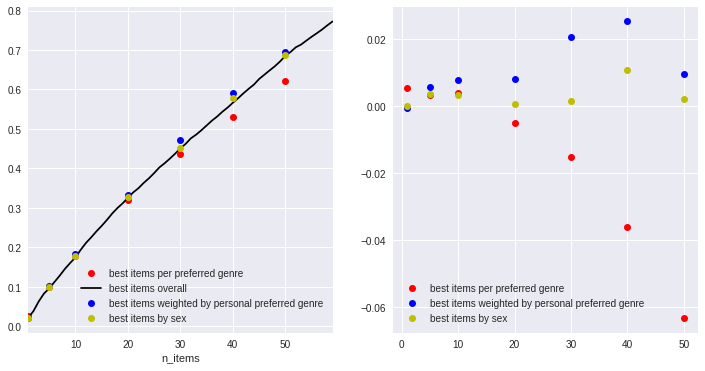

In [62]:
#test set
strategy3a_df["df_test"].plot(ax=ax_test[0],label="best items by sex", style="yo")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,strategy3a_df["df_test"]-strategy1_df["df_test"],"yo",label="best items by sex")
ax_test[1].legend();
f_test

### (3b) by occupation

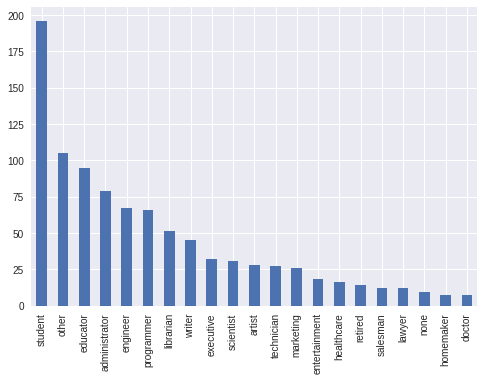

In [63]:
users.occup.value_counts().plot(kind='bar');

In [64]:
items_occup=df_with_usersgroups.groupby(["item","occup"]).rating.sum().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_occup.head()

occup,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
item,,,,,,,,,,,,,,,,,,,,,
1,111.0,30.0,14.0,144.0,150.0,35.0,53.0,21.0,5.0,12.0,...,34.0,22.0,184.0,120.0,NaN,11.0,38.0,342.0,64.0,57.0
2,12.0,3.0,NaN,10.0,48.0,NaN,5.0,8.0,NaN,5.0,...,3.0,4.0,41.0,44.0,2.0,NaN,6.0,104.0,19.0,17.0
3,8.0,NaN,NaN,14.0,30.0,3.0,NaN,4.0,NaN,NaN,...,6.0,1.0,26.0,22.0,NaN,1.0,NaN,83.0,17.0,3.0
4,35.0,14.0,3.0,54.0,77.0,12.0,20.0,6.0,NaN,9.0,...,3.0,NaN,44.0,54.0,13.0,15.0,22.0,143.0,23.0,24.0
5,15.0,NaN,NaN,11.0,15.0,13.0,9.0,6.0,NaN,3.0,...,3.0,9.0,33.0,20.0,3.0,4.0,7.0,50.0,3.0,17.0


In [65]:
def strategy_3b(u):
    """given u index of user, returns the index of the best items according to his occup"""
    df_user_item_u=items_occup[users.loc[u].occup]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3b_df=validate_strategy(strategy_3b,verbose=True)

1 Star Wars (1977)
2 Star Wars (1977)
3 Star Wars (1977)
4 Star Wars (1977)
5 Star Wars (1977)
6 Star Wars (1977)
7 Star Wars (1977)
8 Star Wars (1977)
9 Star Wars (1977)
10 Fargo (1996)
11 Star Wars (1977)
12 Star Wars (1977)
13 Fargo (1996)
14 Star Wars (1977)
15 Fargo (1996)
16 L.A. Confidential (1997)
17 Star Wars (1977)
18 Star Wars (1977)
19 English Patient, The (1996)
20 Air Force One (1997)
21 Star Wars (1977)
22 Star Wars (1977)
23 Return of the Jedi (1983)
24 Return of the Jedi (1983)
25 Star Wars (1977)
26 Star Wars (1977)
27 English Patient, The (1996)
28 Star Wars (1977)
29 Star Wars (1977)
30 Star Wars (1977)
31 Return of the Jedi (1983)
32 Star Wars (1977)
33 Star Wars (1977)
34 Star Wars (1977)
35 Air Force One (1997)
36 Star Wars (1977)
37 Star Wars (1977)
38 Star Wars (1977)
39 L.A. Confidential (1997)
40 Star Wars (1977)
41 Star Wars (1977)
42 Star Wars (1977)
43 English Patient, The (1996)
44 Star Wars (1977)
45 Star Wars (1977)
46 English Patient, The (1996)
47 Eng

383 Star Wars (1977)
384 Star Wars (1977)
385 Star Wars (1977)
386 Titanic (1997)
387 L.A. Confidential (1997)
388 Star Wars (1977)
389 Star Wars (1977)
390 Star Wars (1977)
391 Star Wars (1977)
392 Star Wars (1977)
393 Star Wars (1977)
394 Star Wars (1977)
395 Star Wars (1977)
396 Star Wars (1977)
397 Star Wars (1977)
398 Star Wars (1977)
399 Star Wars (1977)
400 Star Wars (1977)
401 Star Wars (1977)
402 Star Wars (1977)
403 Star Wars (1977)
404 Star Wars (1977)
405 Star Wars (1977)
406 Fargo (1996)
407 Star Wars (1977)
408 Star Wars (1977)
409 Star Wars (1977)
410 Return of the Jedi (1983)
411 Fargo (1996)
412 Fargo (1996)
413 Fargo (1996)
414 Star Wars (1977)
415 Fargo (1996)
416 Star Wars (1977)
417 Star Wars (1977)
418 Contact (1997)
419 Fargo (1996)
420 Fargo (1996)
421 Star Wars (1977)
422 L.A. Confidential (1997)
423 Star Wars (1977)
424 English Patient, The (1996)
425 Star Wars (1977)
426 Fargo (1996)
427 Titanic (1997)
428 Star Wars (1977)
429 Star Wars (1977)
430 Star Wars (

769 Star Wars (1977)
770 Star Wars (1977)
771 Star Wars (1977)
772 Star Wars (1977)
773 Star Wars (1977)
774 Star Wars (1977)
775 Star Wars (1977)
776 English Patient, The (1996)
777 Star Wars (1977)
778 Star Wars (1977)
779 Star Wars (1977)
780 Star Wars (1977)
781 Star Wars (1977)
782 Return of the Jedi (1983)
783 English Patient, The (1996)
784 Star Wars (1977)
785 Star Wars (1977)
786 Star Wars (1977)
787 Star Wars (1977)
788 Star Wars (1977)
789 Star Wars (1977)
790 Star Wars (1977)
791 Fargo (1996)
792 Star Wars (1977)
793 Star Wars (1977)
794 Fargo (1996)
795 Star Wars (1977)
796 Star Wars (1977)
797 Star Wars (1977)
798 Star Wars (1977)
799 Star Wars (1977)
800 Star Wars (1977)
801 Star Wars (1977)
802 Star Wars (1977)
803 Star Wars (1977)
804 Fargo (1996)
805 Star Wars (1977)
806 English Patient, The (1996)
807 Star Wars (1977)
808 Titanic (1997)
809 English Patient, The (1996)
810 Star Wars (1977)
811 Fargo (1996)
812 Star Wars (1977)
813 Star Wars (1977)
814 Star Wars (1977)

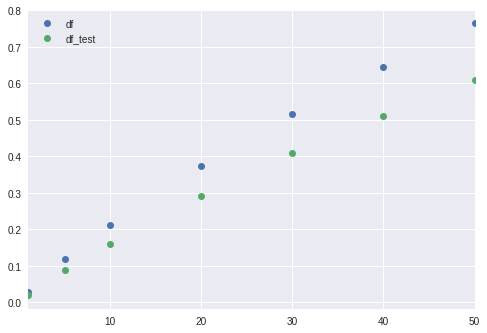

In [66]:
strategy3b_df.plot(style="o")

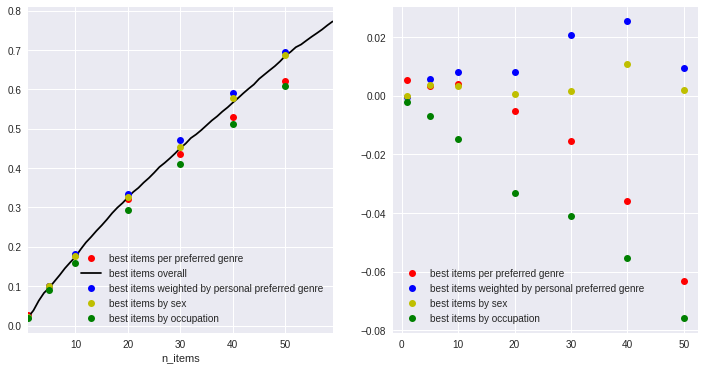

In [67]:
strategy3b_df["df_test"].plot(ax=ax_test[0],label="best items by occupation", style="go")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,strategy3b_df["df_test"]-strategy1_df["df_test"],"go",label="best items by occupation")
ax_test[1].legend();
f_test


This does not work well, since it overfits

### (3c) by age

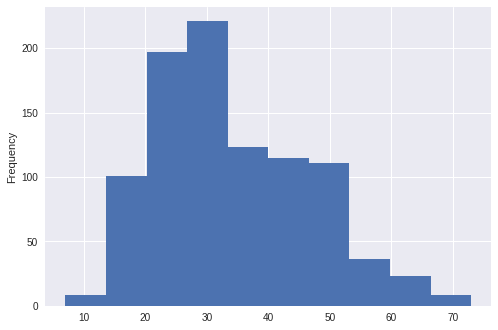

In [68]:
users.age.plot(kind='hist');

For the moment a define arbitrary bins

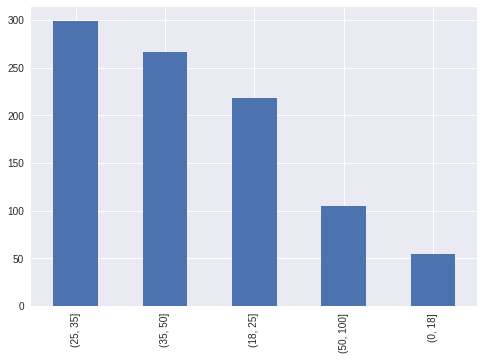

In [69]:
bins=[0,18,25,35,50,100]
users["age_group"]=pd.cut(users.age,bins)
users.age_group.value_counts().plot(kind="bar")

In [70]:
df_with_usersgroups=pd.merge(df, users[["age","sex","occup","age_group"]], left_on='user', right_index=True)

items_age=df_with_usersgroups.groupby(["item","age_group"]).rating.sum().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_age.head()

age_group,"(0, 18]","(18, 25]","(25, 35]","(35, 50]","(50, 100]"
item,,,,,
1,73.0,377.0,569.0,407.0,65.0
2,19.0,134.0,107.0,64.0,10.0
3,27.0,107.0,62.0,25.0,4.0
4,30.0,153.0,252.0,107.0,61.0
5,23.0,72.0,72.0,50.0,11.0


In [71]:
def strategy_3c(u):
    """given u index of user, returns the index of the best items according to his occup"""
    df_user_item_u=items_age[users.loc[u].age_group]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3c_df=validate_strategy(strategy_3c,verbose=True)

1 Star Wars (1977)
2 English Patient, The (1996)
3 Star Wars (1977)
4 Star Wars (1977)
5 Star Wars (1977)
6 Star Wars (1977)
7 English Patient, The (1996)
8 Star Wars (1977)
9 Star Wars (1977)
10 English Patient, The (1996)
11 Star Wars (1977)
12 Star Wars (1977)
13 Star Wars (1977)
14 Star Wars (1977)
15 Star Wars (1977)
16 Star Wars (1977)
17 Star Wars (1977)
18 Star Wars (1977)
19 Star Wars (1977)
20 Star Wars (1977)
21 Star Wars (1977)
22 Star Wars (1977)
23 Star Wars (1977)
24 Star Wars (1977)
25 Star Wars (1977)
26 Star Wars (1977)
27 Star Wars (1977)
28 Star Wars (1977)
29 Star Wars (1977)
30 Scream (1996)
31 Star Wars (1977)
32 Star Wars (1977)
33 Star Wars (1977)
34 Star Wars (1977)
35 Star Wars (1977)
36 Star Wars (1977)
37 Star Wars (1977)
38 Star Wars (1977)
39 Star Wars (1977)
40 Star Wars (1977)
41 Star Wars (1977)
42 Star Wars (1977)
43 Star Wars (1977)
44 Star Wars (1977)
45 Star Wars (1977)
46 Star Wars (1977)
47 English Patient, The (1996)
48 Star Wars (1977)
49 Star 

383 Star Wars (1977)
384 English Patient, The (1996)
385 Star Wars (1977)
386 Star Wars (1977)
387 Star Wars (1977)
388 Star Wars (1977)
389 Star Wars (1977)
390 Star Wars (1977)
391 Star Wars (1977)
392 English Patient, The (1996)
393 Star Wars (1977)
394 Star Wars (1977)
395 Star Wars (1977)
396 English Patient, The (1996)
397 Scream (1996)
398 Star Wars (1977)
399 Star Wars (1977)
400 Star Wars (1977)
401 Star Wars (1977)
402 Star Wars (1977)
403 Star Wars (1977)
404 Star Wars (1977)
405 Star Wars (1977)
406 English Patient, The (1996)
407 Star Wars (1977)
408 Star Wars (1977)
409 Star Wars (1977)
410 Star Wars (1977)
411 Star Wars (1977)
412 Star Wars (1977)
413 English Patient, The (1996)
414 Star Wars (1977)
415 Star Wars (1977)
416 Star Wars (1977)
417 Star Wars (1977)
418 English Patient, The (1996)
419 Star Wars (1977)
420 English Patient, The (1996)
421 Star Wars (1977)
422 Star Wars (1977)
423 English Patient, The (1996)
424 Star Wars (1977)
425 Star Wars (1977)
426 English 

751 Star Wars (1977)
752 English Patient, The (1996)
753 English Patient, The (1996)
754 English Patient, The (1996)
755 Star Wars (1977)
756 Star Wars (1977)
757 Star Wars (1977)
758 Star Wars (1977)
759 Star Wars (1977)
760 Star Wars (1977)
761 Scream (1996)
762 Star Wars (1977)
763 Star Wars (1977)
764 Star Wars (1977)
765 Star Wars (1977)
766 Star Wars (1977)
767 English Patient, The (1996)
768 Star Wars (1977)
769 Star Wars (1977)
770 Star Wars (1977)
771 Star Wars (1977)
772 Star Wars (1977)
773 Star Wars (1977)
774 Star Wars (1977)
775 Star Wars (1977)
776 Star Wars (1977)
777 English Patient, The (1996)
778 Star Wars (1977)
779 Star Wars (1977)
780 Star Wars (1977)
781 Star Wars (1977)
782 Star Wars (1977)
783 Star Wars (1977)
784 Star Wars (1977)
785 Star Wars (1977)
786 Star Wars (1977)
787 Scream (1996)
788 English Patient, The (1996)
789 Star Wars (1977)
790 Star Wars (1977)
791 Star Wars (1977)
792 Star Wars (1977)
793 Star Wars (1977)
794 Star Wars (1977)
795 Star Wars (1

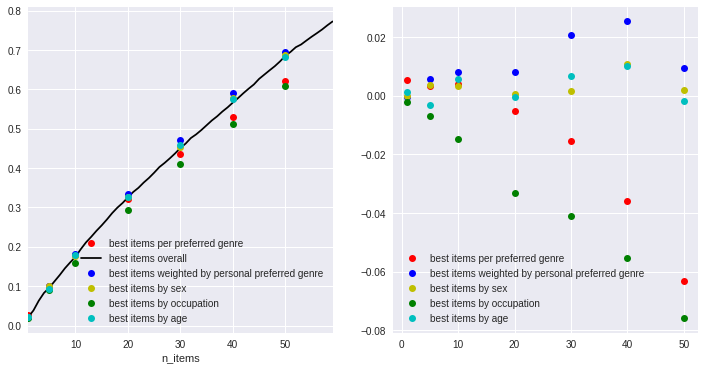

In [72]:
strategy3c_df["df_test"].plot(ax=ax_test[0],label="best items by age", style="co")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,strategy3c_df["df_test"]-strategy1_df["df_test"],"co",label="best items by age")
ax_test[1].legend();
f_test

Small increase, similar to sex

### (3d) by sex and age

In [73]:
items_age_sex=df_with_usersgroups.groupby(["item","age_group","sex"]).rating.sum().unstack().unstack()
#avg_rat_item=df.groupby("item").rating.mean()
#df
items_age_sex.head()

sex             F                                            M           \
age_group (0, 18] (18, 25] (25, 35] (35, 50] (50, 100] (0, 18] (18, 25]   
item                                                                      
1            35.0     69.0    139.0    120.0      17.0    38.0    308.0   
2             6.0     13.0     15.0     14.0       NaN    13.0    121.0   
3             5.0      6.0     16.0      6.0       NaN    22.0    101.0   
4             5.0     24.0     55.0     30.0      12.0    25.0    129.0   
5             9.0     13.0     26.0     14.0       4.0    14.0     59.0   

sex                                    
age_group (25, 35] (35, 50] (50, 100]  
item                                   
1            430.0    287.0      48.0  
2             92.0     50.0      10.0  
3             46.0     19.0       4.0  
4            197.0     77.0      49.0  
5             46.0     36.0       7.0

In [74]:
def strategy_3d(u):
    """given u index of user, returns the index of the best items according to his age/sex"""
    df_user_item_u=items_age_sex[users.loc[u].sex][users.loc[u].age_group]
    items_sorted=df_user_item_u.sort_values(ascending=False)
    return items_sorted.index

strategy3d_df=validate_strategy(strategy_3d,verbose=True)

1 Star Wars (1977)
2 English Patient, The (1996)
3 Star Wars (1977)
4 Star Wars (1977)
5 Star Wars (1977)
6 Star Wars (1977)
7 English Patient, The (1996)
8 Star Wars (1977)
9 Star Wars (1977)
10 English Patient, The (1996)
11 English Patient, The (1996)
12 Star Wars (1977)
13 Star Wars (1977)
14 Star Wars (1977)
15 English Patient, The (1996)
16 Star Wars (1977)
17 Star Wars (1977)
18 Star Wars (1977)
19 Star Wars (1977)
20 English Patient, The (1996)
21 Star Wars (1977)
22 Star Wars (1977)
23 Star Wars (1977)
24 Scream (1996)
25 Star Wars (1977)
26 Star Wars (1977)
27 English Patient, The (1996)
28 Star Wars (1977)
29 Star Wars (1977)
30 Star Wars (1977)
31 Star Wars (1977)
32 Star Wars (1977)
33 Star Wars (1977)
34 English Patient, The (1996)
35 Scream (1996)
36 Scream (1996)
37 Star Wars (1977)
38 Star Wars (1977)
39 Star Wars (1977)
40 Star Wars (1977)
41 Star Wars (1977)
42 Star Wars (1977)
43 Star Wars (1977)
44 Star Wars (1977)
45 Star Wars (1977)
46 Star Wars (1977)
47 English

370 English Patient, The (1996)
371 Star Wars (1977)
372 Scream (1996)
373 Scream (1996)
374 Star Wars (1977)
375 Star Wars (1977)
376 Star Wars (1977)
377 Star Wars (1977)
378 Star Wars (1977)
379 Star Wars (1977)
380 Star Wars (1977)
381 Star Wars (1977)
382 Star Wars (1977)
383 Star Wars (1977)
384 English Patient, The (1996)
385 Star Wars (1977)
386 Star Wars (1977)
387 Star Wars (1977)
388 Star Wars (1977)
389 English Patient, The (1996)
390 English Patient, The (1996)
391 Star Wars (1977)
392 English Patient, The (1996)
393 Star Wars (1977)
394 Star Wars (1977)
395 Star Wars (1977)
396 English Patient, The (1996)
397 Star Wars (1977)
398 Star Wars (1977)
399 Star Wars (1977)
400 Star Wars (1977)
401 English Patient, The (1996)
402 Star Wars (1977)
403 Star Wars (1977)
404 Star Wars (1977)
405 Scream (1996)
406 English Patient, The (1996)
407 Star Wars (1977)
408 Star Wars (1977)
409 Star Wars (1977)
410 Star Wars (1977)
411 Star Wars (1977)
412 Star Wars (1977)
413 English Patien

721 Scream (1996)
722 English Patient, The (1996)
723 Star Wars (1977)
724 Star Wars (1977)
725 Star Wars (1977)
726 Scream (1996)
727 Star Wars (1977)
728 English Patient, The (1996)
729 Star Wars (1977)
730 Star Wars (1977)
731 English Patient, The (1996)
732 Star Wars (1977)
733 English Patient, The (1996)
734 Scream (1996)
735 Star Wars (1977)
736 English Patient, The (1996)
737 Star Wars (1977)
738 Star Wars (1977)
739 Star Wars (1977)
740 Scream (1996)
741 Star Wars (1977)
742 Star Wars (1977)
743 Star Wars (1977)
744 Star Wars (1977)
745 Star Wars (1977)
746 Star Wars (1977)
747 Star Wars (1977)
748 Star Wars (1977)
749 Star Wars (1977)
750 Star Wars (1977)
751 Scream (1996)
752 English Patient, The (1996)
753 English Patient, The (1996)
754 English Patient, The (1996)
755 English Patient, The (1996)
756 Star Wars (1977)
757 Star Wars (1977)
758 Star Wars (1977)
759 Scream (1996)
760 Star Wars (1977)
761 Star Wars (1977)
762 Star Wars (1977)
763 Star Wars (1977)
764 Star Wars (1

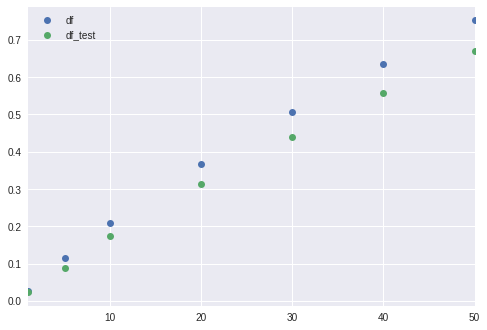

In [75]:
strategy3d_df.plot(style="o")

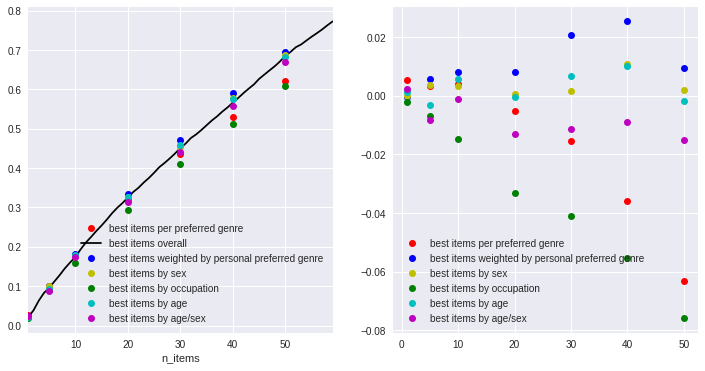

In [76]:
strategy3d_df["df_test"].plot(ax=ax_test[0],label="best items by age/sex", style="mo")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,strategy3d_df["df_test"]-strategy1_df["df_test"],"mo",label="best items by age/sex")
ax_test[1].legend();
f_test

This overfits

## 4th Strategy: Collaborative filtering

### Build sparse matrix with ratings, dim=users * items

In [77]:
import scipy.sparse

#these are the ratings, read as a sparse matrix, with index starting from zero, hence the -1
user_item=scipy.sparse.coo_matrix((np.array(df["rating"]),(np.array(df["user"]-1),np.array(df["item"]-1))))

#these are if there is a rating
user_item_n=scipy.sparse.coo_matrix((np.ones(len(df)),(np.array(df["user"]-1),np.array(df["item"]-1))))

print(user_item.count_nonzero())
print(user_item_n.count_nonzero())
print(user_item.shape)
print(user_item_n.shape)

80000
80000
(943, 1682)
(943, 1682)


In [78]:
user_user=(user_item.dot(user_item.T)).toarray()
item_item=(user_item.T.dot(user_item)).toarray()
#user_user_n=(user_item_n.dot(user_item_n.T)).toarray()
#item_item_n=(user_item_n.T.dot(user_item_n)).toarray()

In [79]:
item_item_row_max=np.sqrt(item_item.max(axis=0))
item_item_norm=np.nan_to_num(item_item/item_item_row_max[:,np.newaxis]/item_item_row_max[np.newaxis,:])
user_user_row_max=np.sqrt(user_user.max(axis=0))
user_user_norm=np.nan_to_num(user_user/user_user_row_max[:,np.newaxis]/user_user_row_max[np.newaxis,:])


/home/baruselli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


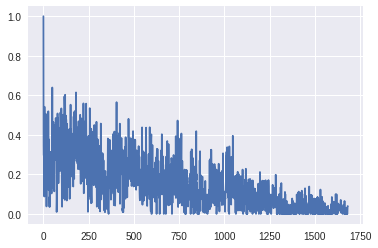

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(item_item_norm[0])

### (4a) similar items

In [81]:
user_item.toarray().shape
#user_user.shape

(943, 1682)

In [82]:
#user_item_b=user_user_norm.dot(user_item.toarray()).dot(item_item_norm)
user_item_b=user_user.dot(user_item.toarray()).dot(item_item)


In [83]:
user_item_b.max()

668427977596

In [84]:
def strategy_4a(u):
    return user_item_b[u-1].argsort()[::-1]+1
strategy4a_df=validate_strategy(strategy_4a,verbose=True)    

1 Star Wars (1977)
2 Star Wars (1977)
3 Star Wars (1977)
4 Star Wars (1977)
5 Star Wars (1977)
6 Star Wars (1977)
7 Star Wars (1977)
8 Star Wars (1977)
9 Star Wars (1977)
10 Star Wars (1977)
11 Star Wars (1977)
12 Star Wars (1977)
13 Star Wars (1977)
14 Star Wars (1977)
15 Star Wars (1977)
16 Star Wars (1977)
17 Star Wars (1977)
18 Star Wars (1977)
19 Star Wars (1977)
20 Star Wars (1977)
21 Star Wars (1977)
22 Star Wars (1977)
23 Star Wars (1977)
24 Star Wars (1977)
25 Star Wars (1977)
26 Star Wars (1977)
27 Star Wars (1977)
28 Star Wars (1977)
29 Star Wars (1977)
30 Star Wars (1977)
31 Star Wars (1977)
32 Star Wars (1977)
33 Star Wars (1977)
34 Star Wars (1977)
35 Star Wars (1977)
36 Star Wars (1977)
37 Star Wars (1977)
38 Star Wars (1977)
39 Star Wars (1977)
40 Star Wars (1977)
41 Star Wars (1977)
42 Star Wars (1977)
43 Star Wars (1977)
44 Star Wars (1977)
45 Star Wars (1977)
46 Star Wars (1977)
47 Star Wars (1977)
48 Star Wars (1977)
49 Star Wars (1977)
50 Star Wars (1977)
51 Star W

398 Star Wars (1977)
399 Star Wars (1977)
400 Star Wars (1977)
401 Star Wars (1977)
402 Star Wars (1977)
403 Star Wars (1977)
404 Star Wars (1977)
405 Star Wars (1977)
406 Star Wars (1977)
407 Star Wars (1977)
408 Star Wars (1977)
409 Star Wars (1977)
410 Star Wars (1977)
411 Star Wars (1977)
412 Star Wars (1977)
413 Star Wars (1977)
414 Star Wars (1977)
415 Star Wars (1977)
416 Star Wars (1977)
417 Star Wars (1977)
418 Star Wars (1977)
419 Star Wars (1977)
420 Star Wars (1977)
421 Star Wars (1977)
422 Star Wars (1977)
423 Star Wars (1977)
424 Star Wars (1977)
425 Star Wars (1977)
426 Star Wars (1977)
427 Star Wars (1977)
428 Star Wars (1977)
429 Star Wars (1977)
430 Star Wars (1977)
431 Star Wars (1977)
432 Star Wars (1977)
433 Star Wars (1977)
434 Star Wars (1977)
435 Star Wars (1977)
436 Star Wars (1977)
437 Star Wars (1977)
438 Star Wars (1977)
439 Star Wars (1977)
440 Star Wars (1977)
441 Star Wars (1977)
442 Star Wars (1977)
443 Star Wars (1977)
444 Star Wars (1977)
445 Star Wars

791 Star Wars (1977)
792 Star Wars (1977)
793 Star Wars (1977)
794 Star Wars (1977)
795 Star Wars (1977)
796 Star Wars (1977)
797 Star Wars (1977)
798 Star Wars (1977)
799 Star Wars (1977)
800 Star Wars (1977)
801 Star Wars (1977)
802 Star Wars (1977)
803 Star Wars (1977)
804 Star Wars (1977)
805 Star Wars (1977)
806 Star Wars (1977)
807 Star Wars (1977)
808 Star Wars (1977)
809 Star Wars (1977)
810 Star Wars (1977)
811 Star Wars (1977)
812 Star Wars (1977)
813 Star Wars (1977)
814 Star Wars (1977)
815 Star Wars (1977)
816 Star Wars (1977)
817 Star Wars (1977)
818 Star Wars (1977)
819 Star Wars (1977)
820 Star Wars (1977)
821 Star Wars (1977)
822 Star Wars (1977)
823 Star Wars (1977)
824 Star Wars (1977)
825 Star Wars (1977)
826 Star Wars (1977)
827 Star Wars (1977)
828 Star Wars (1977)
829 Star Wars (1977)
830 Star Wars (1977)
831 Star Wars (1977)
832 Star Wars (1977)
833 Star Wars (1977)
834 Star Wars (1977)
835 Star Wars (1977)
836 Star Wars (1977)
837 Star Wars (1977)
838 Star Wars

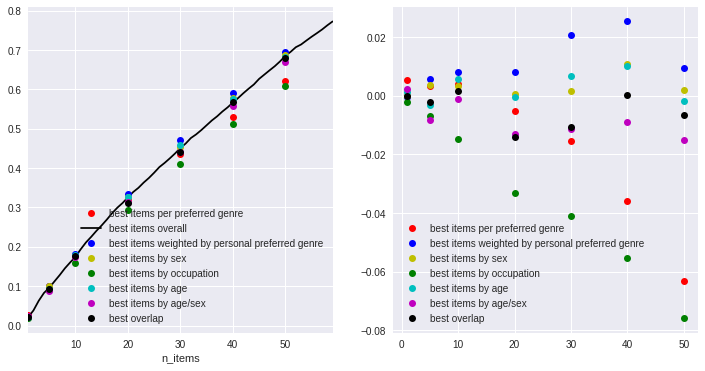

In [85]:
strategy4a_df["df_test"].plot(ax=ax_test[0],label="best overlap", style="ko")
ax_test[0].legend();
ax_test[1].plot(rec_items_list,strategy4a_df["df_test"]-strategy1_df["df_test"],"ko",label="best overlap")
ax_test[1].legend();
f_test

In [86]:
#from datetime import datetime
#datetime.fromtimestamp(train1.time[0])

In [87]:
sorting=item_item[0].argsort()[-10:]
items.iloc[sorting]

,name,date,?,link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy_norm,Film-Noir_norm,Horror_norm,Musical_norm,Mystery_norm,Romance_norm,Sci-Fi_norm,Thriller_norm,War_norm,Western_norm
237,Jerry Maguire (1996),13-Dec-1996,NaN,http://us.imdb.com/M/title-exact?Jerry%20Magui...,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.707107,0.000000,0.00000,0.000000,0.0
172,"Empire Strikes Back, The (1980)",01-Jan-1980,NaN,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.408248,0.408248,0.00000,0.408248,0.0
127,"Godfather, The (1972)",01-Jan-1972,NaN,"http://us.imdb.com/M/title-exact?Godfather,%20...",0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
117,"Rock, The (1996)",07-Jun-1996,NaN,"http://us.imdb.com/M/title-exact?Rock,%20The%2...",0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.57735,0.000000,0.0
121,Independence Day (ID4) (1996),03-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Independence%...,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.577350,0.00000,0.577350,0.0
174,Raiders of the Lost Ark (1981),01-Jan-1981,NaN,http://us.imdb.com/M/title-exact?Raiders%20of%...,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.57735,0.000000,0.0
181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.447214,0.447214,0.00000,0.447214,0.0
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.447214,0.447214,0.00000,0.447214,0.0
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0


And I plot the average score as a function of the verified raccomendations (the ones present in the test set)/ the total possible raccomendations

NameError: name 'n_reccs_train' is not defined

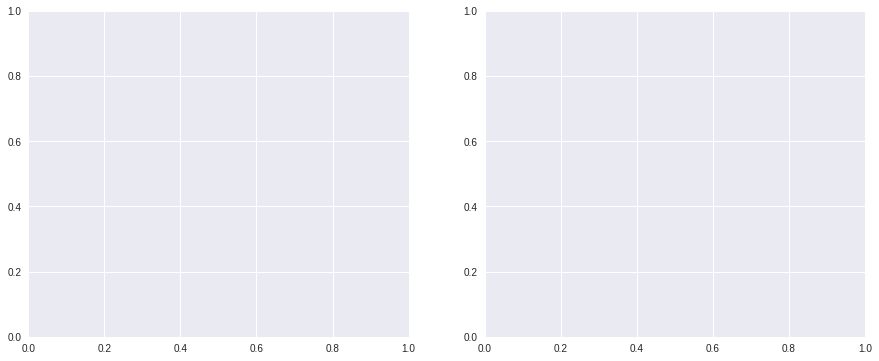

In [88]:
f, ax = plt.subplots(1,2,figsize=(15,6))

#ax[0].plot(rec_items_list,avg_rat)
#ax[0].plot(rec_items_list,np.full(len(rec_items_list),avg))
#ax[1].plot(rec_items_list,n_reccs)
ax[0].plot(np.array(n_reccs_train)/max(n_reccs_train),avg_rat_train, "r--",label="recommendation_train")
ax[0].plot(np.array(n_reccs)/max(n_reccs),avg_rat, "b", label="recommendation_test")
ax[0].axhline(avg,label="avg train set",c="r")
ax[0].axhline(avg_test,label="avg test set",c="b")
ax[0].set_xlabel("fraction of possible recommendations")
ax[0].set_ylabel("avg rating")
ax[0].legend();


ax[1].plot(np.array(rec_items_list),avg_rat_train, "r--",label="recommendation_train")
ax[1].plot(np.array(rec_items_list),avg_rat, "b",label="recommendation_test")
ax[1].axhline(avg,label="avg train set",c="r")
ax[1].axhline(avg_test,label="avg test set",c="b")
ax[1].set_xlabel("recommended items per user")
ax[1].set_ylabel("avg rating")
ax[1].legend();

Under this approach, the overall best movie is "Schindler's List"

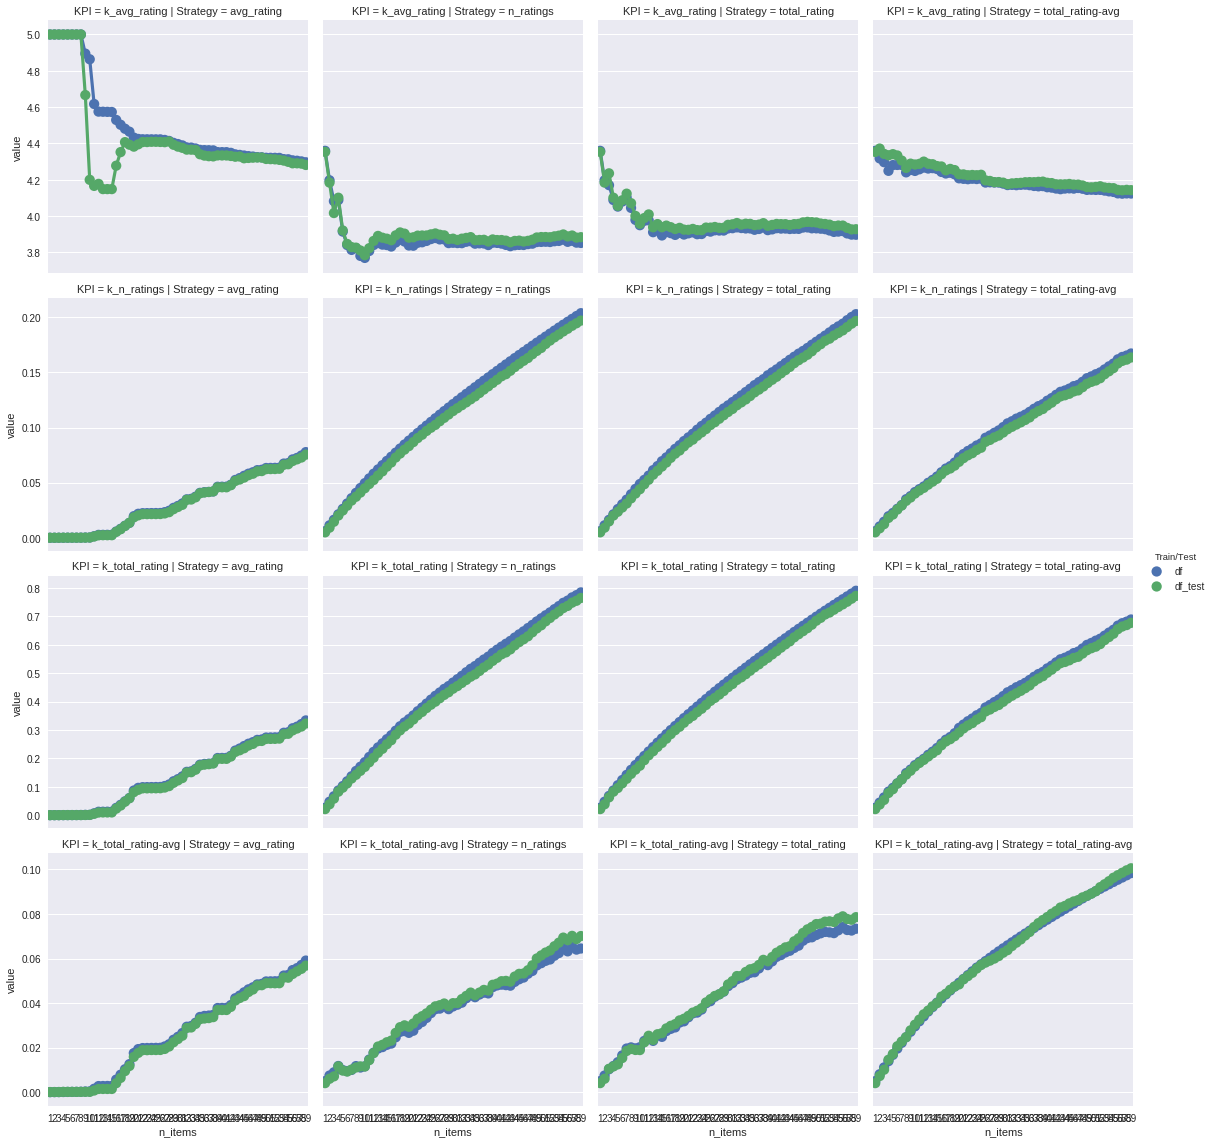

In [126]:
#f, ax = plt.subplots(4,4,figsize=(25,25))
import seaborn
fg = seaborn.factorplot(col="Strategy",row='KPI',hue="Train/Test",y="value",x="n_items", data=strategy_melt,
                       style="-",sharey="row",sharex=True) # hue='Mean'